In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno # library to visualize missing values
import warnings


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns',None) # show all the colums if it's more than 15 columns
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('previous_application.csv')

In [3]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [6]:
description_df = pd.read_csv('columns_description.csv')


In [7]:
prev_description_df = description_df[description_df['Table'] == 'previous_application.csv']

In [8]:
prev_description_df

,Unnamed: 0,Table,Row,Description,Special
122,176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
123,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
124,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
125,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
126,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
127,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
128,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
129,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
130,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
131,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


# Data Cleaning  

In [9]:
days_cols = df.columns[df.columns.str.contains(pat = 'DAYS')]

for col in days_cols:
    df[col] = np.abs(df[col])

<AxesSubplot:>

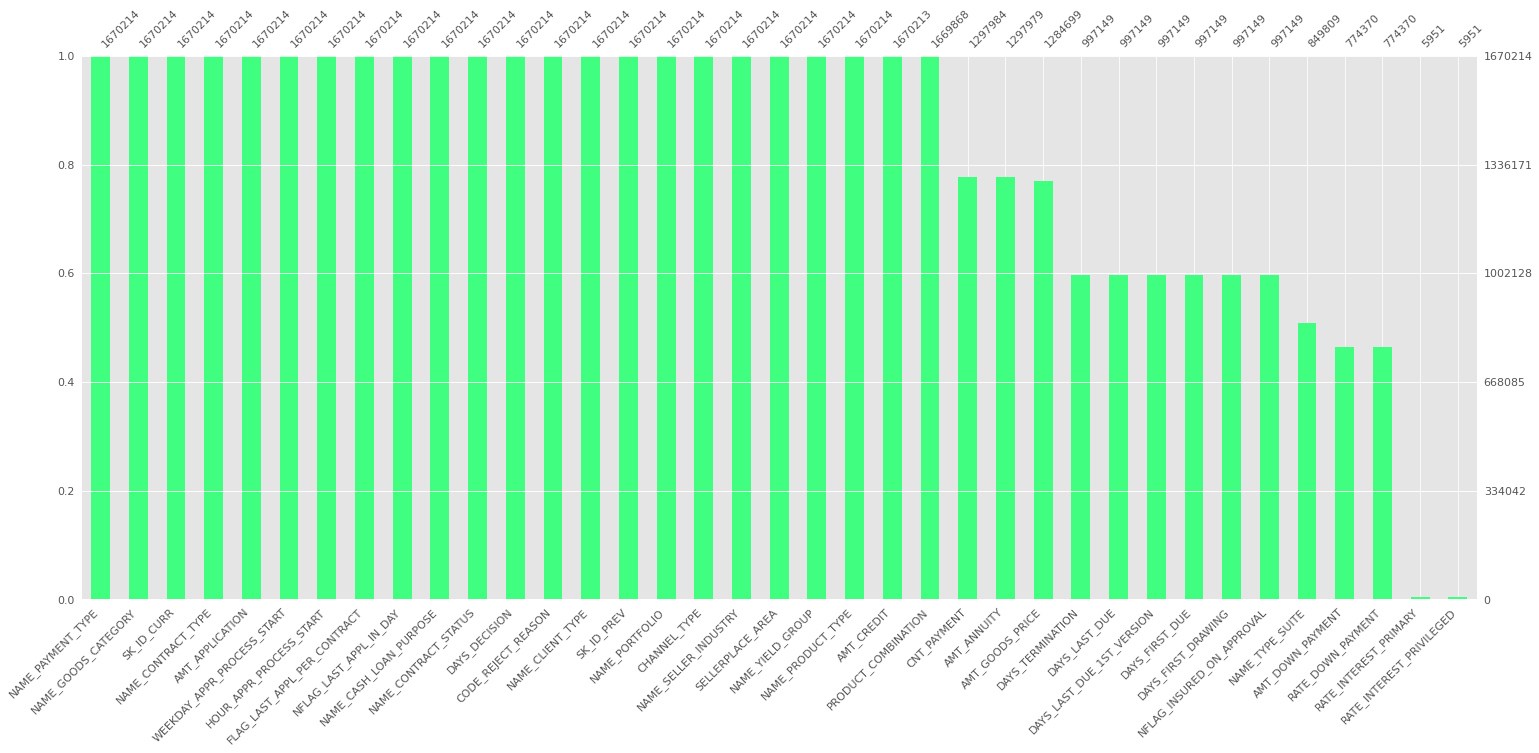

In [10]:
msno.bar(df,sort= 'descending',color=(0.25,1,0.5),fontsize =11)

In [11]:
prev_null_vals = ((df.isna().sum()/len(df))*100).sort_values(ascending=False)
print(prev_null_vals)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [12]:
df.drop(df.columns[round(((df.isna().sum()/len(df))*100))>40]
                    ,axis=1,inplace=True)

In [13]:
prev_null_vals = round(((df.isna().sum()/len(df))*100).sort_values(ascending=False),3)
prev_null_vals

NFLAG_INSURED_ON_APPROVAL      40.298
DAYS_LAST_DUE                  40.298
DAYS_FIRST_DRAWING             40.298
DAYS_LAST_DUE_1ST_VERSION      40.298
DAYS_FIRST_DUE                 40.298
DAYS_TERMINATION               40.298
AMT_GOODS_PRICE                23.082
AMT_ANNUITY                    22.287
CNT_PAYMENT                    22.286
PRODUCT_COMBINATION             0.021
AMT_CREDIT                      0.000
NAME_PORTFOLIO                  0.000
NAME_YIELD_GROUP                0.000
NAME_SELLER_INDUSTRY            0.000
SELLERPLACE_AREA                0.000
CHANNEL_TYPE                    0.000
NAME_PRODUCT_TYPE               0.000
SK_ID_PREV                      0.000
NAME_GOODS_CATEGORY             0.000
SK_ID_CURR                      0.000
CODE_REJECT_REASON              0.000
NAME_PAYMENT_TYPE               0.000
DAYS_DECISION                   0.000
NAME_CONTRACT_STATUS            0.000
NAME_CASH_LOAN_PURPOSE          0.000
NFLAG_LAST_APPL_IN_DAY          0.000
FLAG_LAST_AP

In [14]:
df.drop(df.columns[round(((df.isna().sum()/len(df))*100))>=40]
                    ,axis=1,inplace=True)

In [15]:
# for loop to check if these columns has 'XNA' or 'XAP' in them and apend them to an empty list
cols_with_XNA = []
for col in df.columns:
    if ('XNA' in df[col].unique()) or ('XAP' in df[col].unique()):
        
        cols_with_XNA.append(col)
cols_with_XNA 

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [16]:
    

for col in cols_with_XNA:
    df[col].replace({
            'XNA': np.nan,
            'XAP': np.nan
        },inplace=True)

In [17]:
prev_null_vals = round(((df.isna().sum()/len(df))*100).sort_values(ascending=False),3)
prev_null_vals

NAME_CASH_LOAN_PURPOSE         95.831
CODE_REJECT_REASON             81.327
NAME_PRODUCT_TYPE              63.684
NAME_GOODS_CATEGORY            56.927
NAME_SELLER_INDUSTRY           51.234
NAME_PAYMENT_TYPE              37.563
NAME_YIELD_GROUP               30.967
AMT_GOODS_PRICE                23.082
AMT_ANNUITY                    22.287
CNT_PAYMENT                    22.286
NAME_PORTFOLIO                 22.286
NAME_CLIENT_TYPE                0.116
NAME_CONTRACT_TYPE              0.021
PRODUCT_COMBINATION             0.021
AMT_CREDIT                      0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_STATUS            0.000
NFLAG_LAST_APPL_IN_DAY          0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
HOUR_APPR_PROCESS_START         0.000
WEEKDAY_APPR_PROCESS_START      0.000
AMT_APPLICATION                 0.000
DAYS_DECISION                   0.000
dtype: float

In [18]:
df.drop(df.columns[round(((df.isna().sum()/len(df))*100))>=40]
                    ,axis=1,inplace=True)

In [19]:
prev_null_vals = round(((df.isna().sum()/len(df))*100).sort_values(ascending=False),3)
prev_null_vals

NAME_PAYMENT_TYPE              37.563
NAME_YIELD_GROUP               30.967
AMT_GOODS_PRICE                23.082
AMT_ANNUITY                    22.287
CNT_PAYMENT                    22.286
NAME_PORTFOLIO                 22.286
NAME_CLIENT_TYPE                0.116
PRODUCT_COMBINATION             0.021
NAME_CONTRACT_TYPE              0.021
AMT_CREDIT                      0.000
SELLERPLACE_AREA                0.000
CHANNEL_TYPE                    0.000
SK_ID_PREV                      0.000
DAYS_DECISION                   0.000
NAME_CONTRACT_STATUS            0.000
SK_ID_CURR                      0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
HOUR_APPR_PROCESS_START         0.000
WEEKDAY_APPR_PROCESS_START      0.000
AMT_APPLICATION                 0.000
NFLAG_LAST_APPL_IN_DAY          0.000
dtype: float64

## Fill Null Values

In [20]:
categorical_imputer = SimpleImputer(strategy='most_frequent')


In [21]:
df[['NAME_PAYMENT_TYPE','NAME_YIELD_GROUP','NAME_PORTFOLIO',
         'NAME_CLIENT_TYPE','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE']] = categorical_imputer.fit_transform(df[['NAME_PAYMENT_TYPE','NAME_YIELD_GROUP','NAME_PORTFOLIO','NAME_CLIENT_TYPE','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE']])

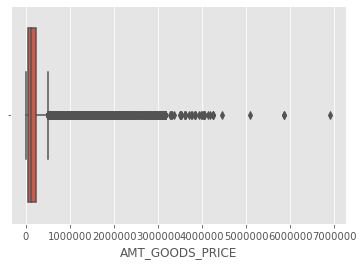

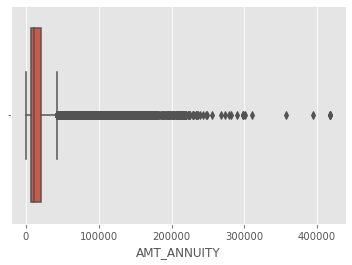

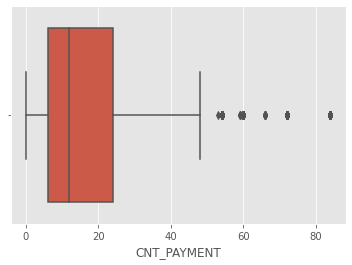

In [22]:
x = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']
for i in x:
    sns.boxplot(x = df[i])
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

In [23]:
num_imputer = SimpleImputer(strategy='median')

In [24]:
df[['AMT_GOODS_PRICE','AMT_ANNUITY', 'CNT_PAYMENT']] = num_imputer.fit_transform(df[['AMT_GOODS_PRICE','AMT_ANNUITY', 'CNT_PAYMENT']])

In [25]:
df['AMT_APPLICATION'] = num_imputer.fit_transform(df[['AMT_APPLICATION']])

In [26]:
df.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CLIENT_TYPE               0
NAME_PORTFOLIO                 0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [27]:
df[df['AMT_CREDIT'].isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,112320.0,FRIDAY,10,Y,1,Approved,608,Cash through the bank,Repeater,Cards,Country-wide,20,0.0,middle,Card Street


In [28]:
df['AMT_CREDIT'] = num_imputer.fit_transform(df[['AMT_CREDIT']])

In [29]:
df.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CLIENT_TYPE               0
NAME_PORTFOLIO                 0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

# Feature Engineering 

## Interest Extractions

In [30]:
df['SELLERPLACE_AREA']  = abs(df['SELLERPLACE_AREA'])

In [31]:
df[['AMT_CREDIT', 'AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']] = df[['AMT_CREDIT', 'AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']].astype('int')

In [32]:
df[['AMT_CREDIT', 'AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY', 'CNT_PAYMENT']]

,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,17145,17145,17145,1730,12
1,679671,607500,607500,25188,36
2,136444,112500,112500,15060,12
3,470790,450000,450000,47041,12
4,404055,337500,337500,31924,24
...,...,...,...,...,...
1670209,311400,267295,267295,14704,30
1670210,64291,87750,87750,6622,12
1670211,102523,105237,105237,11520,10
1670212,191880,180000,180000,18821,12


In [33]:
df['AMT_ANNUITY']//12

0           144
1          2099
2          1255
3          3920
4          2660
           ... 
1670209    1225
1670210     551
1670211     960
1670212    1568
1670213    1369
Name: AMT_ANNUITY, Length: 1670214, dtype: int32

In [34]:
df['AMT_PAYMENT_MONTHLY'] = df['AMT_ANNUITY']//12

In [35]:
df[['AMT_CREDIT', 'AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY', 'CNT_PAYMENT']]

,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,17145,17145,17145,1730,12
1,679671,607500,607500,25188,36
2,136444,112500,112500,15060,12
3,470790,450000,450000,47041,12
4,404055,337500,337500,31924,24
...,...,...,...,...,...
1670209,311400,267295,267295,14704,30
1670210,64291,87750,87750,6622,12
1670211,102523,105237,105237,11520,10
1670212,191880,180000,180000,18821,12


In [36]:
def yrs_to_complete_loan(cnt_payment):
    year = cnt_payment/12
    if year < 1:
        return cnt_payment/100
    else:
        return round(year,1)

In [37]:
df['CNT_PAYMENT'].apply(yrs_to_complete_loan)

0          1.0
1          3.0
2          1.0
3          1.0
4          2.0
          ... 
1670209    2.5
1670210    1.0
1670211    0.1
1670212    1.0
1670213    4.0
Name: CNT_PAYMENT, Length: 1670214, dtype: float64

In [38]:
df['PAYMENT_MONTHS/YRS'] = df['CNT_PAYMENT'].apply(yrs_to_complete_loan)

In [39]:
df['AMT_INTEREST'] = (df['AMT_ANNUITY']*df['CNT_PAYMENT']) - df['AMT_CREDIT']

In [40]:
(df['AMT_INTEREST']/df['AMT_CREDIT'])*100

0           21.084864
1           33.412784
2           32.449943
3           19.903142
4           89.621710
              ...    
1670209     41.657033
1670210     23.600504
1670211     12.365030
1670212     17.704816
1670213    119.080000
Length: 1670214, dtype: float64

In [41]:
df['INTEREST_RATE'] = round((df['AMT_INTEREST']/df['AMT_CREDIT'])*100, 2)

## Conversion Extraction 

In [42]:
df['DAYS_DECISION']/30

0           2.433333
1           5.466667
2          10.033333
3          17.066667
4          26.033333
             ...    
1670209    18.133333
1670210    56.466667
1670211    49.600000
1670212    39.500000
1670213    39.766667
Name: DAYS_DECISION, Length: 1670214, dtype: float64

In [43]:
def months_decision(days):
    
    months = str(round(days/30,0))
    day = str(days%30)
    res = months +'.'+day
    return res

In [44]:
df['DAYS_DECISION'].apply(months_decision)

0           2.0.13
1           5.0.14
2           10.0.1
3           17.0.2
4           26.0.1
            ...   
1670209     18.0.4
1670210    56.0.14
1670211    50.0.18
1670212    40.0.15
1670213    40.0.23
Name: DAYS_DECISION, Length: 1670214, dtype: object

In [45]:
df['MONTHS_DECISION']= df['DAYS_DECISION'].apply(months_decision)

In [46]:
df['MONTHS_DECISION'] = df['MONTHS_DECISION'].str.split('.', expand=True)[0] + '.' + df['MONTHS_DECISION'].str.split('.', expand=True)[2]

In [47]:
df['MONTHS_DECISION'] = df['MONTHS_DECISION'].astype('float')

In [48]:
print(sorted(df['HOUR_APPR_PROCESS_START'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [49]:
def days_part(x):
    
    if x in range(5,12):
        return 'Morning'
    
    elif x in range(12,17):
        return 'Afternoon'
    
    elif x in range(17, 21):
        return 'Evening'
    else:
        return 'Night'

In [50]:
df['PERIOD_APPR_PROCESS_START'] = df['HOUR_APPR_PROCESS_START'].apply(days_part)

In [51]:
df['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [52]:
df['NFLAG_LAST_APPL_IN_DAY'].value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [53]:
df.drop(['HOUR_APPR_PROCESS_START', 'DAYS_DECISION'], axis = 1, inplace= True)

In [54]:
df[df['INTEREST_RATE'] < 0][['AMT_CREDIT','AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_INTEREST','INTEREST_RATE']]

,AMT_CREDIT,AMT_ANNUITY,CNT_PAYMENT,AMT_INTEREST,INTEREST_RATE
17,180000,9000,0,-180000,-100.0
34,202500,10125,0,-202500,-100.0
45,292500,14625,0,-292500,-100.0
49,225000,11250,0,-225000,-100.0
80,675000,33750,0,-675000,-100.0
...,...,...,...,...,...
1669959,450000,22500,0,-450000,-100.0
1669960,225000,11250,0,-225000,-100.0
1669962,450000,22500,0,-450000,-100.0
1670191,45000,2250,0,-45000,-100.0


In [55]:
df.drop(df[df['INTEREST_RATE'] < 0].index, inplace = True)

In [56]:
df.drop(df[df['CNT_PAYMENT'] == 0].index, inplace = True)

In [57]:
df.drop(df[(df['AMT_CREDIT'] == 0 ) | (df['AMT_APPLICATION'] == 0)].index, inplace=True)

## Continuous  Columns Extractions

In [58]:
for i in ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']:
    print(i)
    print (f'min: {min(df[i])}\nmax: {max(df[i])}')
    print("_"*15)

AMT_ANNUITY
min: 579
max: 418058
_______________
AMT_APPLICATION
min: 3456
max: 5850000
_______________
AMT_CREDIT
min: 3456
max: 4509688
_______________
AMT_GOODS_PRICE
min: 3456
max: 5850000
_______________


In [59]:
def goods_amount_categories(amount):
    
    if amount in range(0,5000):
        return 'V.low'
    elif amount in range(5000,15000):
        return 'low'
    elif amount in range(15000,30000):
        return 'High'
    else:
        return 'V.high'

In [60]:
df['ANNUITY_CAT'] = df['AMT_ANNUITY'].apply(goods_amount_categories)

In [61]:
def amount_categories(amount):
    
    
    if amount in range(0,50000):
        return 'V.low'
    elif amount in range(50000,100000):
        return 'Low'
    elif amount in range(100000,300000):
        return 'Medium'
    elif amount in range(300000,500000):
        return 'High'
    else:
        return 'V.high'

In [62]:
df.shape

(1186800, 26)

In [63]:
df['AMT_CREDIT'].apply(amount_categories).value_counts()

Medium    368660
V.low     287079
Low       265780
V.high    167479
High       97802
Name: AMT_CREDIT, dtype: int64

In [64]:
df['CREDIT_CAT'] = df['AMT_CREDIT'].apply(amount_categories)

In [65]:
df['APPLICATION_CAT'] = df['AMT_APPLICATION'].apply(amount_categories)

In [66]:
df['GOODS_CAT'] = df['AMT_GOODS_PRICE'].apply(amount_categories)

In [67]:
df[['AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_PAYMENT', 'AMT_PAYMENT_MONTHLY','AMT_INTEREST','INTEREST_RATE']].head(10)

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT,AMT_PAYMENT_MONTHLY,AMT_INTEREST,INTEREST_RATE
0,17145,1730,17145,12,144,3615,21.08
1,679671,25188,607500,36,2099,227097,33.41
2,136444,15060,112500,12,1255,44276,32.45
3,470790,47041,450000,12,3920,93702,19.90
4,404055,31924,337500,24,2660,362121,89.62
5,340573,23703,315000,18,1975,86081,25.28
10,335754,11368,270000,54,947,278118,82.83
11,246397,13832,211500,30,1152,168563,68.41
12,174361,12165,148500,24,1013,117599,67.45
13,57564,7654,53779,8,637,3668,6.37


In [68]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'AMT_PAYMENT_MONTHLY', 'PAYMENT_MONTHS/YRS', 'AMT_INTEREST', 'INTEREST_RATE', 'MONTHS_DECISION', 'PERIOD_APPR_PROCESS_START', 'ANNUITY_CAT', 'CREDIT_CAT', 'APPLICATION_CAT', 'GOODS_CAT'], dtype='object')

# Explotary Data Analysis 

- We will consider `NAME_CONTRACT_STATUS` our Target Feature in this data frame
- We will drop `Canceled` and `Unused offer` from the column values 


In [69]:
df['NAME_CONTRACT_STATUS'].value_counts()

Approved        939005
Refused         213432
Unused offer     24206
Canceled         10157
Name: NAME_CONTRACT_STATUS, dtype: int64

In [70]:
df.drop(df[(df['NAME_CONTRACT_STATUS'] == 'Unused offer') | (df['NAME_CONTRACT_STATUS'] == 'Canceled')].index,inplace=True)

In [71]:
df['NAME_CONTRACT_STATUS'].value_counts()

Approved    939005
Refused     213432
Name: NAME_CONTRACT_STATUS, dtype: int64

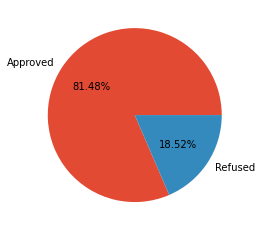

In [72]:
plt.pie(df['NAME_CONTRACT_STATUS'].value_counts(), labels=['Approved','Refused'], autopct='%.2f%%');

## UniVariate analysis

In [73]:
approved_df = df[df['NAME_CONTRACT_STATUS'] == 'Approved']

In [74]:
refused_df = df[df['NAME_CONTRACT_STATUS'] == 'Refused']

In [75]:
df.drop(df[(df['AMT_APPLICATION'] == 0) & (df['AMT_CREDIT'] == 0) & (df['AMT_ANNUITY'] == 0)].index,
             inplace= True
            )

In [76]:
def numerical_univariant_without_outliers(feature):
    
    # approved loan applications
    approved_q1 = approved_df[feature].quantile(0.25)
    approved_q3 = approved_df[feature].quantile(0.75)
    approved_iqr = approved_q3 - approved_q1
    approved_min_value =  (1.5 * approved_iqr - approved_q1)
    approved_max_value = (approved_q3 + 1.5 * approved_iqr)
    
    # refused loan applications
    refused_q1 = refused_df[feature].quantile(0.25)
    refused_q3 = refused_df[feature].quantile(0.75)
    refused_iqr = refused_q3 - refused_q1
    refused_min_value = ( 1.5 * refused_iqr - refused_q1)
    refused_max_value = (refused_q3 + 1.5 * refused_iqr)

    
    
    plt.figure(figsize=(20, 10))
    sns.distplot(
        approved_df[approved_df[feature] <= approved_max_value][feature],
        label='approved applications',
        hist=False,
        color='green'
        
    )        
    sns.distplot(
        refused_df[refused_df[feature] <= refused_max_value][feature],
        label='refused applications',
        hist=False,
        color='red'
    )
    
    print(f'{feature} Approved loan application')
    print(f' minimum value Excluding outliers is {int(approved_min_value)}')
    print(f' maximum value is Excluding outliers {int(approved_max_value)}')
    
    print('*'*20)
    print(f'{feature} Decliend loan application')
    print(f' minimum value Excluding outliers is {int(refused_min_value)}')
    print(f' maximum value Excluding outliers is {int(refused_max_value)}')
    plt.title(f'{feature} Excluding Outliers')
    
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()
    

In [77]:
def perc_above_bars(ax):
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [78]:
# function to plot categorical column to two subplots of approved and decliend loan applications plots
def categorical_univariant_analysis(feature):
    plt.style.use('ggplot')
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    
    
    palette  = ['tab:green', 'tab:red']
    
    # for clients with approved loan application
    ax = sns.countplot(
        
        data = df,
        x = feature,
        hue = 'NAME_CONTRACT_STATUS',
        palette= palette
        
                    )
    
    ax.set(xlabel = feature, ylabel = 'count')
    perc_above_bars(ax)

    plt.xticks(rotation = 90)
    print(f"Approved Loan percentage for each class in {feature}: \n")
    # calculate the percentage of the approved loan application from the original data (previous_df)
    print(round((df[feature].value_counts()/len(df))*100,1),'\n')
    print("*"*25)

    # for clients with declined loan application
    plt.subplot(1,2,2)
    sns.color_palette('RdBu')
    
    sns.countplot(data = refused_df,
                    x = feature,
                    order=sorted(refused_df[feature].unique())
                    )
    plt.title(f'{feature} of clients with Declined application Loan')

    print(f"Declined Loan percentage for each class in {feature}: \n")
    # calculate the percentage of the declined loan application from the original data (previous_df)
    print(round((refused_df[feature].value_counts()/len(df))*100,1),'\n')
    print("*"*25)
    
    
    plt.xticks(rotation = 90)
    
    plt.tight_layout()
    plt.show()

In [79]:
num_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA',
            'CNT_PAYMENT', 'AMT_PAYMENT_MONTHLY', 'PAYMENT_MONTHS/YRS', 'AMT_INTEREST', 'INTEREST_RATE', 'MONTHS_DECISION']

* In The below plots we can conclude that:
1. In `AMT_ANNUITY` column:
    - most decliend applicatins have amount greater than 400000
2. In `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_GOODS_PRICE` columns:
    - most decliend applicatins have amount greater than 450000    
3. `NFLAG_LAST_APPL_IN_DAY` column:
    - Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a         day. Rarely it could also be an error in our system that one application is in the database twice

    - It doesn't have effect on wheter the application is approved or not 
    
    * *we will drop this column*

4. In `SELLERPLACE_AREA` column:
    - `SELLERPLACE_AREA`:Selling area of seller place of the previous application
    - It doesn't affect whether the application is accepted or not because we can notice that applications that take less than 100 are declined while some applications take moe than 100 and still are accepted     
    
    * *we will drop this column* 
    

5. In `CNT_PAYMENT` column:

    - Most declined applications have payment count more than 40
    


6. In `AMT_PAYMENT_MONTHLY` column:

    - Most Refused Contracts have more than 3000 in monthly premium

7. In `PAYMENT_MONTHS/YRS` column:
    
    - Most refused contracts have more than 4 payment years 


8. In `AMT_INTEREST` column:
    
    - Most refused contracts have more than approxmaitlt 55% in interest amount

9. In `INTEREST_RATE` column:
    
    - Most refused contracts have more than 200000 in interest rate


10. In `MONTHS_DECISION` column:
    - It doesn't affect whether the application is accepted or not because we can notice that applications that take less than 80 months are declined while some applications take moe than 80 month and still are accepted     
    
    * *we will drop this column* 
    
    

AMT_ANNUITY Approved loan application
 minimum value Excluding outliers is 12462
 maximum value is Excluding outliers 37194
********************
AMT_ANNUITY Decliend loan application
 minimum value Excluding outliers is 18479
 maximum value Excluding outliers is 58337


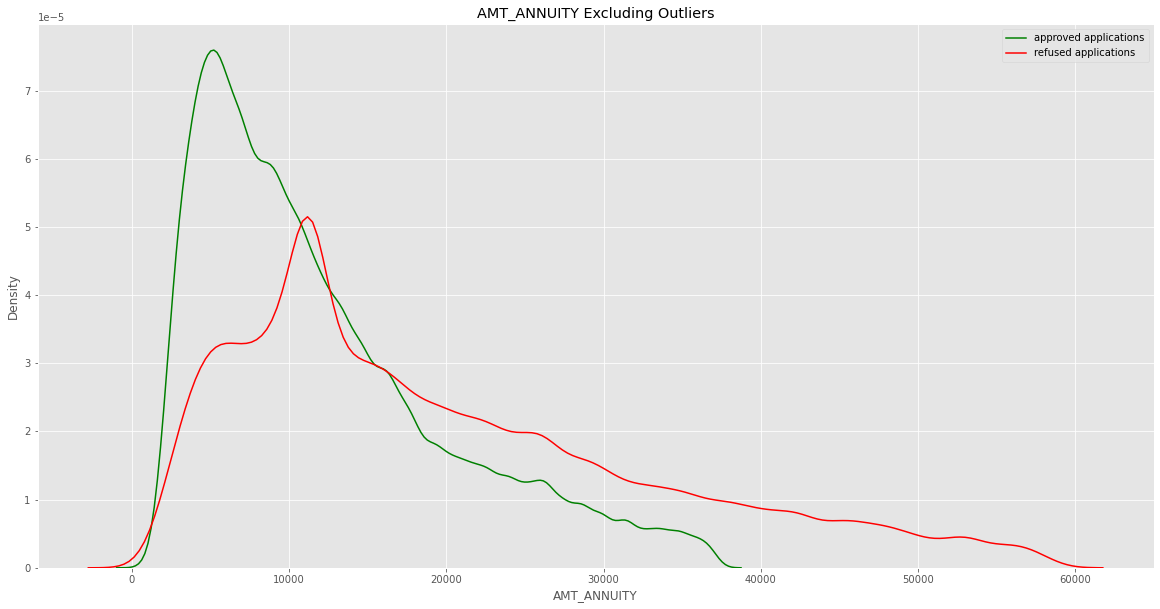

AMT_APPLICATION Approved loan application
 minimum value Excluding outliers is 181295
 maximum value is Excluding outliers 432777
********************
AMT_APPLICATION Decliend loan application
 minimum value Excluding outliers is 605250
 maximum value Excluding outliers is 1248750


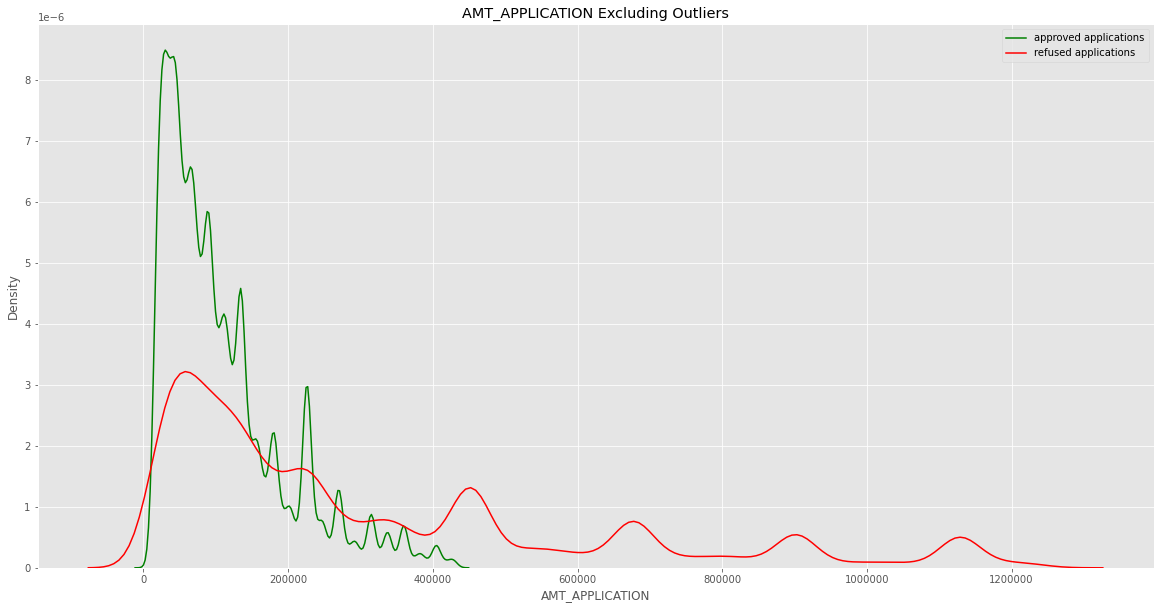

AMT_CREDIT Approved loan application
 minimum value Excluding outliers is 203872
 maximum value is Excluding outliers 467707
********************
AMT_CREDIT Decliend loan application
 minimum value Excluding outliers is 715500
 maximum value Excluding outliers is 1444500


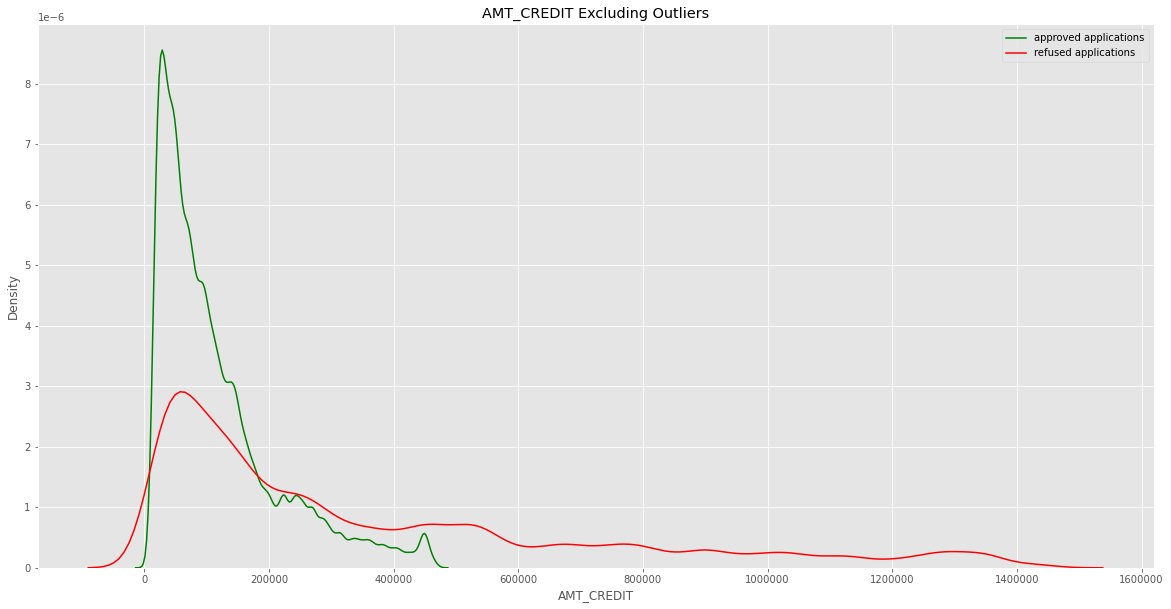

AMT_GOODS_PRICE Approved loan application
 minimum value Excluding outliers is 181295
 maximum value is Excluding outliers 432777
********************
AMT_GOODS_PRICE Decliend loan application
 minimum value Excluding outliers is 605250
 maximum value Excluding outliers is 1248750


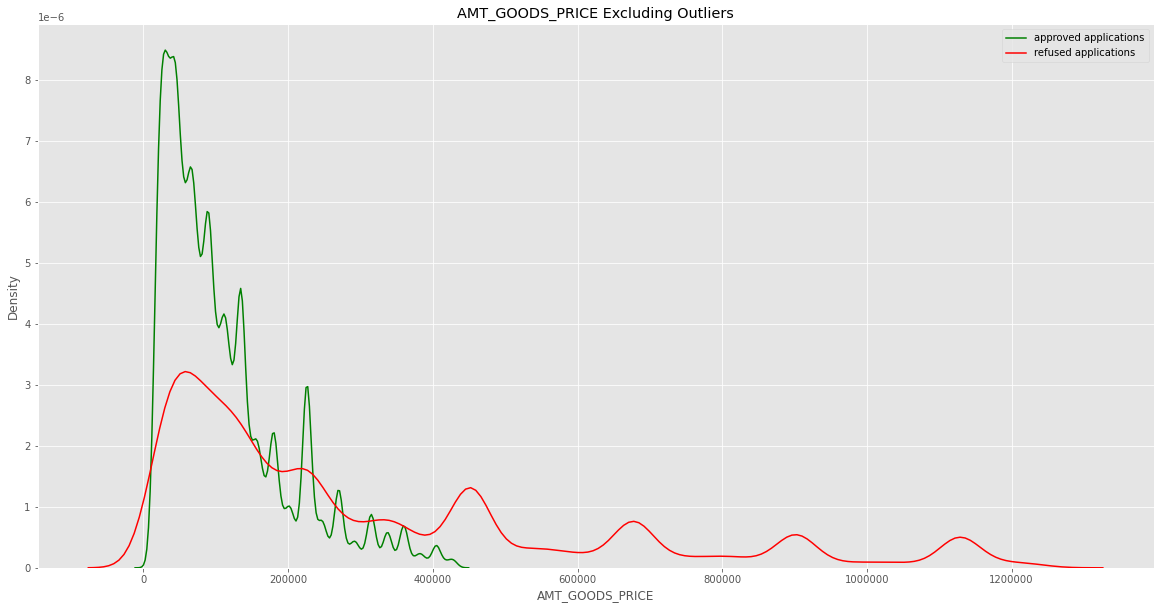

NFLAG_LAST_APPL_IN_DAY Approved loan application
 minimum value Excluding outliers is -1
 maximum value is Excluding outliers 1
********************
NFLAG_LAST_APPL_IN_DAY Decliend loan application
 minimum value Excluding outliers is -1
 maximum value Excluding outliers is 1


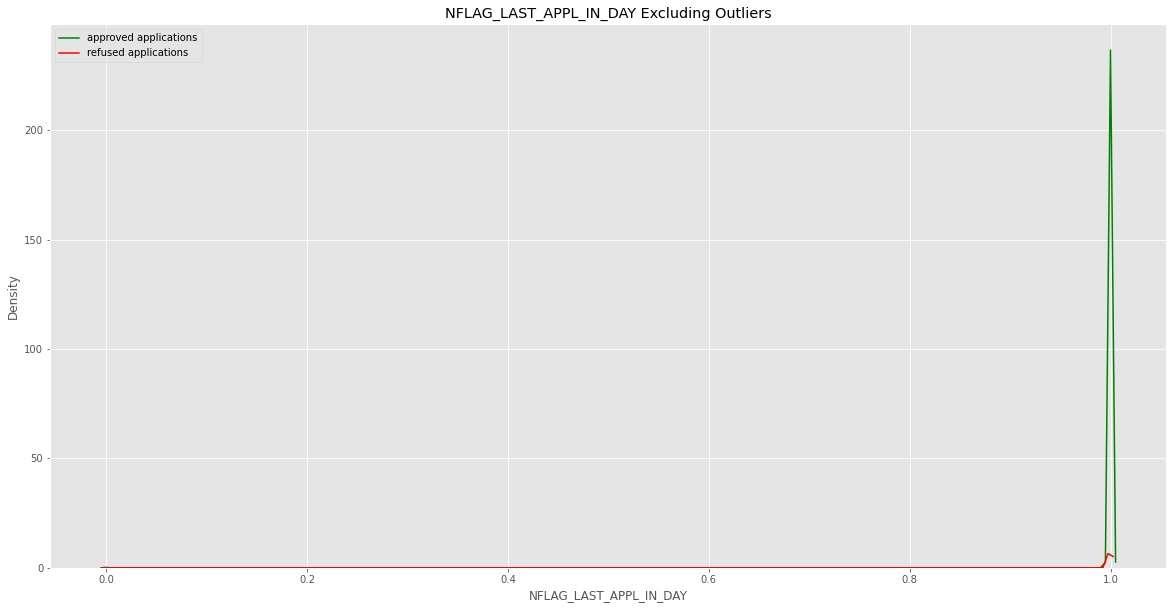

SELLERPLACE_AREA Approved loan application
 minimum value Excluding outliers is 269
 maximum value is Excluding outliers 451
********************
SELLERPLACE_AREA Decliend loan application
 minimum value Excluding outliers is 72
 maximum value Excluding outliers is 123


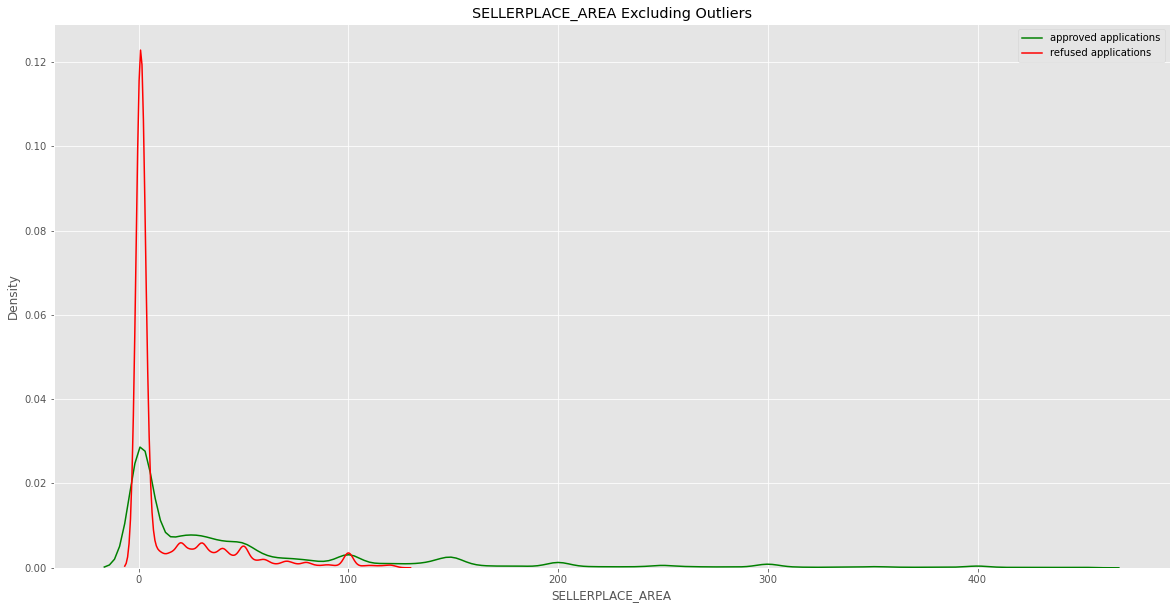

CNT_PAYMENT Approved loan application
 minimum value Excluding outliers is 2
 maximum value is Excluding outliers 30
********************
CNT_PAYMENT Decliend loan application
 minimum value Excluding outliers is 42
 maximum value Excluding outliers is 102


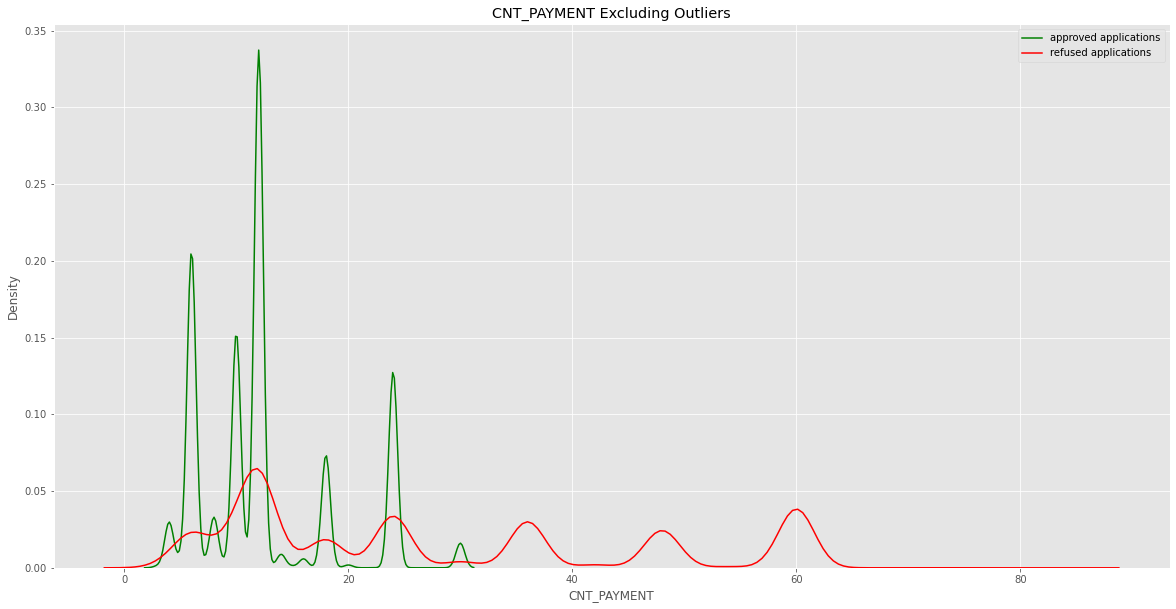

AMT_PAYMENT_MONTHLY Approved loan application
 minimum value Excluding outliers is 1038
 maximum value is Excluding outliers 3098
********************
AMT_PAYMENT_MONTHLY Decliend loan application
 minimum value Excluding outliers is 1540
 maximum value Excluding outliers is 4860


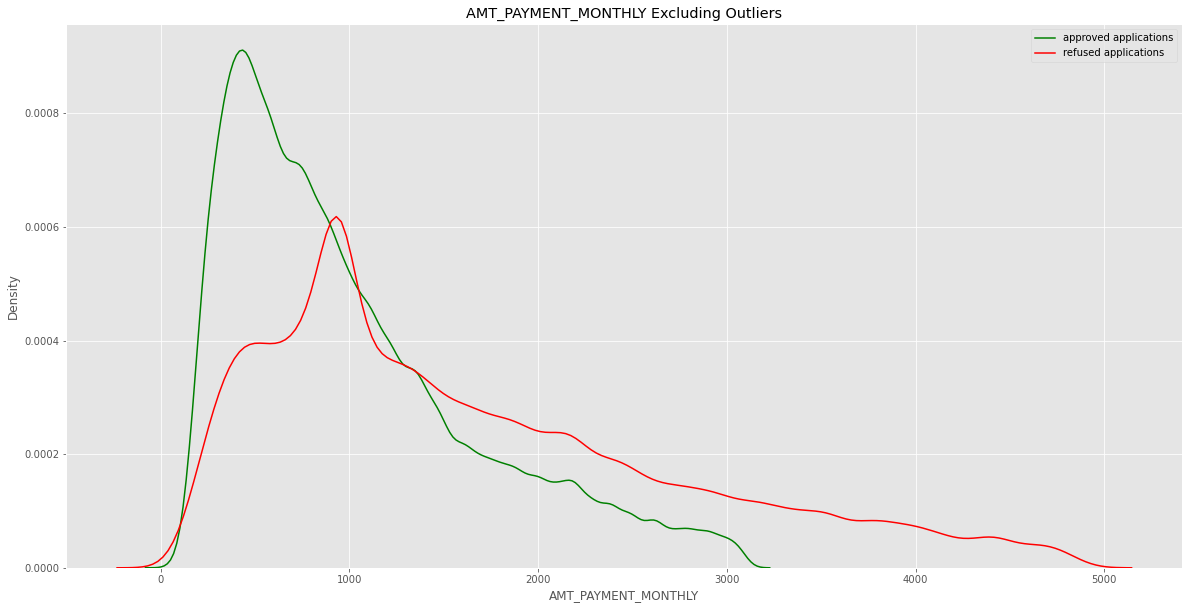

PAYMENT_MONTHS/YRS Approved loan application
 minimum value Excluding outliers is 1
 maximum value is Excluding outliers 3
********************
PAYMENT_MONTHS/YRS Decliend loan application
 minimum value Excluding outliers is 3
 maximum value Excluding outliers is 8


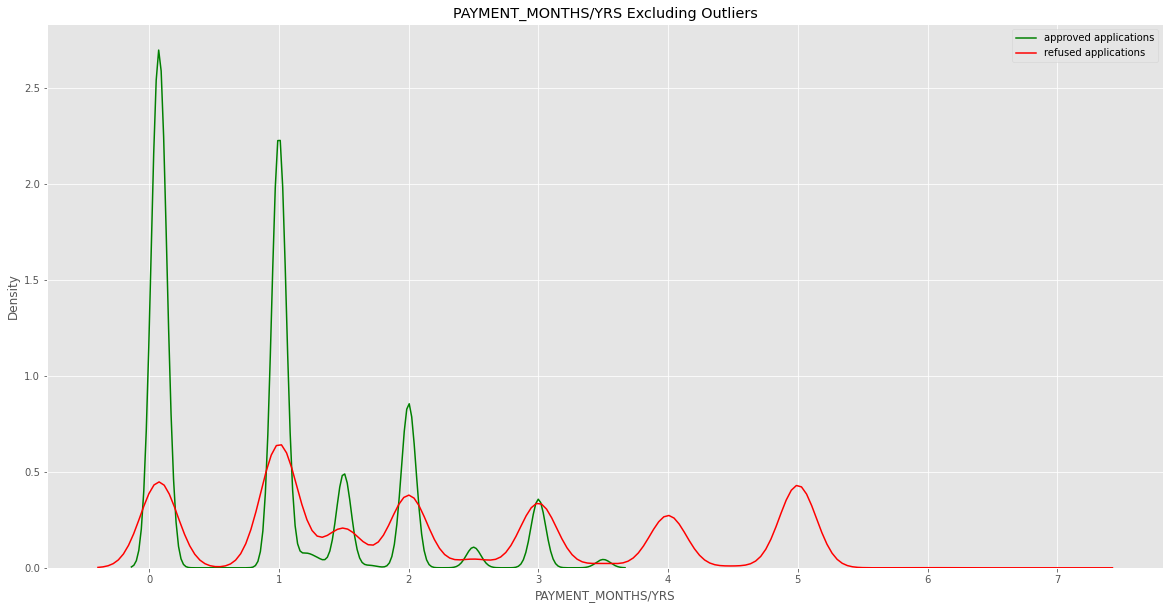

AMT_INTEREST Approved loan application
 minimum value Excluding outliers is 71871
 maximum value is Excluding outliers 143529
********************
AMT_INTEREST Decliend loan application
 minimum value Excluding outliers is 590414
 maximum value Excluding outliers is 1051227


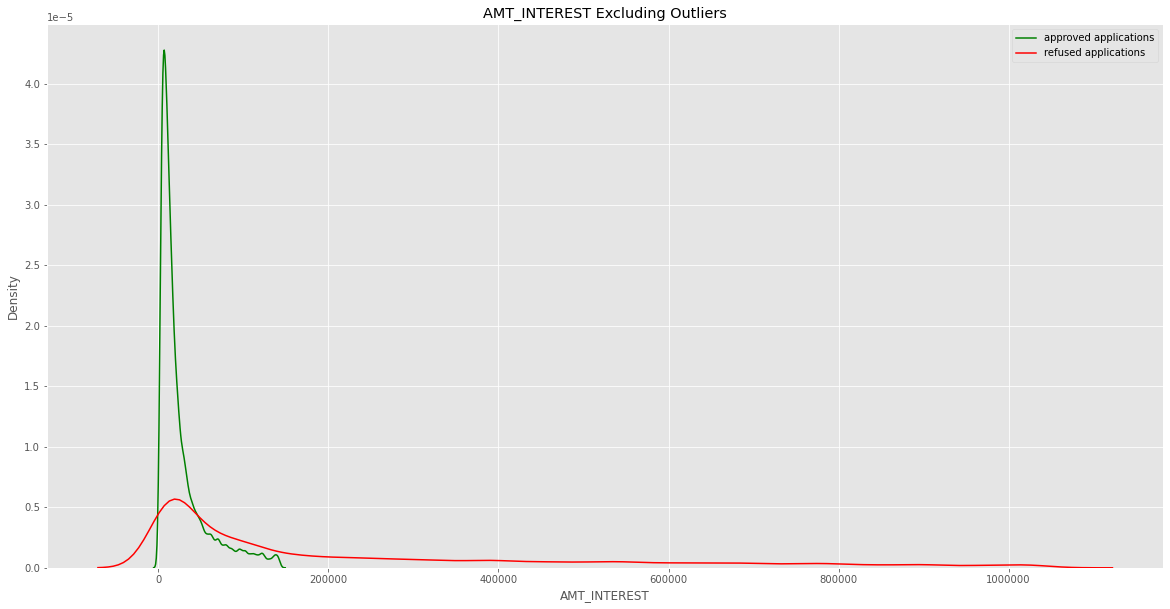

INTEREST_RATE Approved loan application
 minimum value Excluding outliers is 25
 maximum value is Excluding outliers 79
********************
INTEREST_RATE Decliend loan application
 minimum value Excluding outliers is 49
 maximum value Excluding outliers is 146


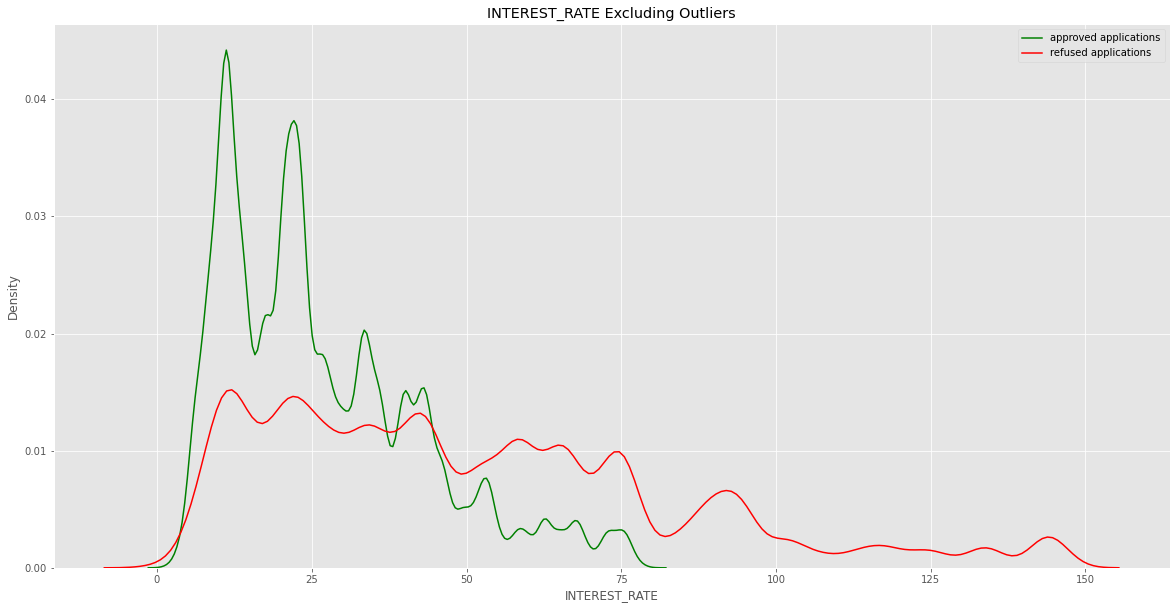

MONTHS_DECISION Approved loan application
 minimum value Excluding outliers is 43
 maximum value is Excluding outliers 115
********************
MONTHS_DECISION Decliend loan application
 minimum value Excluding outliers is 43
 maximum value Excluding outliers is 96


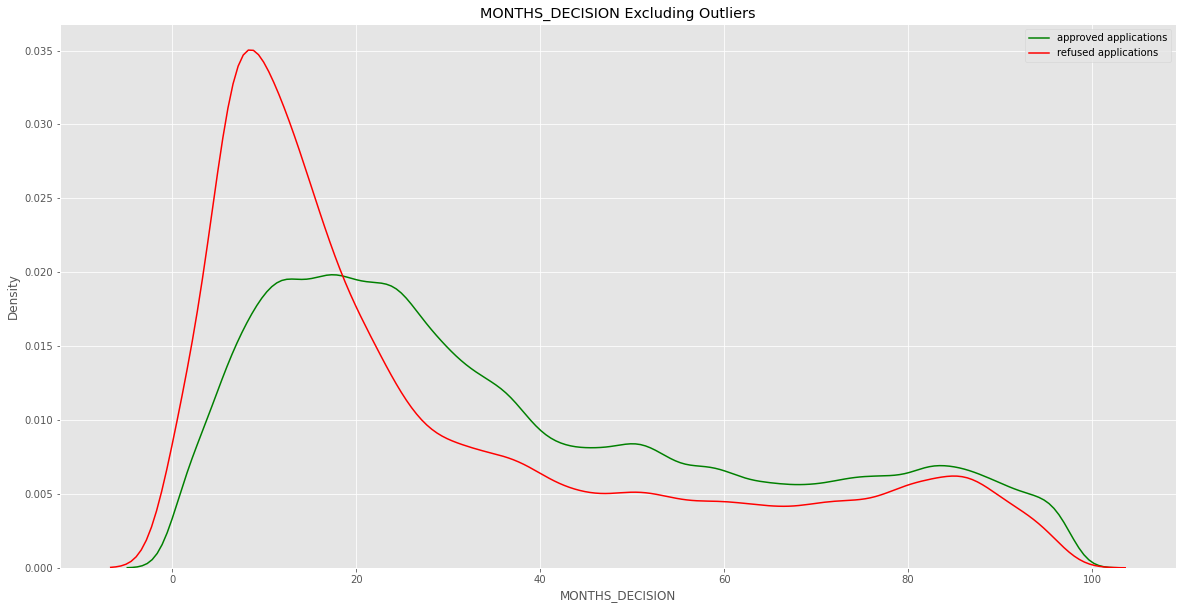

In [80]:
for col in num_cols:
    numerical_univariant_without_outliers(col)

In [81]:
df.drop(['MONTHS_DECISION','SELLERPLACE_AREA','NFLAG_LAST_APPL_IN_DAY'], axis=1,inplace=True)

In [82]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'PERIOD_APPR_PROCESS_START', 'ANNUITY_CAT', 'CREDIT_CAT', 'APPLICATION_CAT', 'GOODS_CAT'], dtype='object')

In the below cell we can conclude that:


- In `NAME_CONTRACT_TYPE` column:
    - Most approved contracts (89.4%) are *Consumer Loans*
    - While most refused contracts arze *Cash Loans*


- In `WEEKDAY_APPR_PROCESS_START` column:
    - The column doesn't effect whether the contract is Accepted or Refused 
    


- In `FLAG_LAST_APPL_PER_CONTRACT` column:
    - There *N* value has 0% in both Accepted and Refused contracts
    - It doesn't effect the target 
    

- In `NAME_PAYMENT_TYPE` column:
    - `Cash through the bank` has the highest count/percntage in both Approved and Refused contracts
    

- In `NAME_CLIENT_TYPE` column:
    - `Repeater` has the highest count/percntage in both Approved and Refused contracts
    

- In `NAME_PORTFOLIO` column:
    - Most Accepted contracts are *POS*
    - Most Refused contracts are *Cash*
    

- In `CHANNEL_TYPE` column:
    - Most Accepted contracts are *Country-wide* channels 
    -  Most Refused contracts are *Credit and cash offices* channels
    

- In `NAME_YIELD_GROUP` column:
    - Most Approved contracts are the *Middle* groups
    - Most Refused contracts are  *low-normal*groups
    

- In `PRODUCT_COMBINATION` column:
    - Most Accepted contracts are the *POS household with interest* product 
    - Most Refused contracts are *Cash X-Sell: low* product
    


- In `PERIOD_APPR_PROCESS_START` column :
    - In both Aprroved and Refused contracts most of them are in the *Afternoon*

Approved Loan percentage for each class in NAME_CONTRACT_TYPE: 

Consumer loans     60.8
Cash loans         39.2
Revolving loans     0.0
Name: NAME_CONTRACT_TYPE, dtype: float64 

*************************
Declined Loan percentage for each class in NAME_CONTRACT_TYPE: 

Cash loans         12.1
Consumer loans      6.4
Revolving loans     0.0
Name: NAME_CONTRACT_TYPE, dtype: float64 

*************************


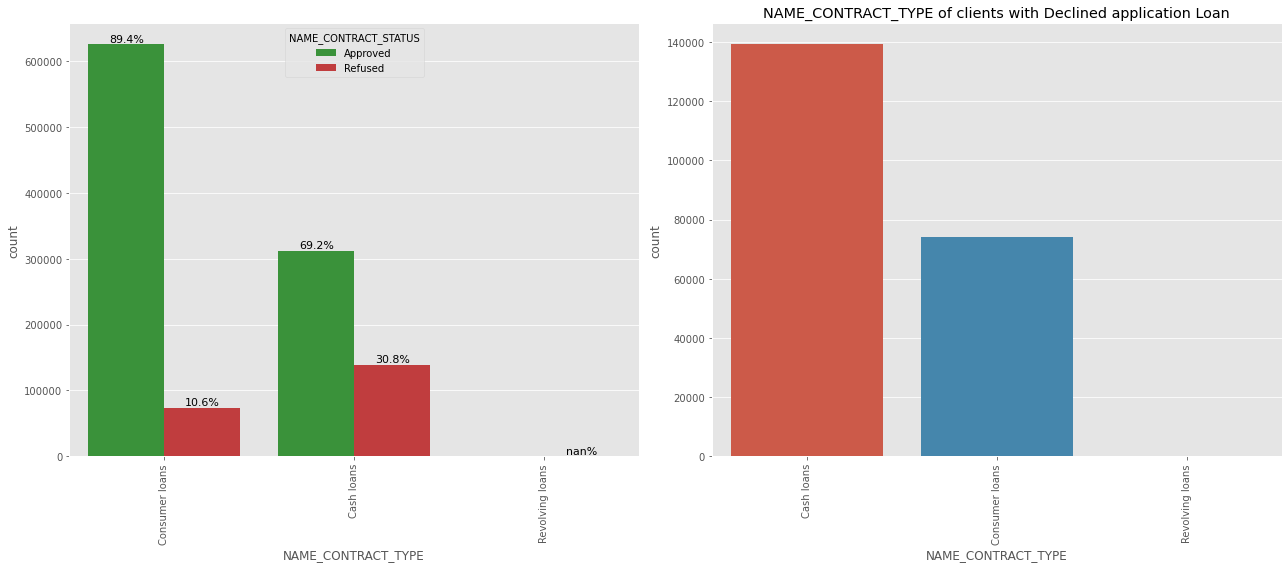

Approved Loan percentage for each class in WEEKDAY_APPR_PROCESS_START: 

SATURDAY     15.5
FRIDAY       14.9
WEDNESDAY    14.7
TUESDAY      14.7
MONDAY       14.6
THURSDAY     14.5
SUNDAY       11.2
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64 

*************************
Declined Loan percentage for each class in WEEKDAY_APPR_PROCESS_START: 

TUESDAY      2.9
MONDAY       2.9
WEDNESDAY    2.9
FRIDAY       2.9
THURSDAY     2.9
SATURDAY     2.4
SUNDAY       1.6
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64 

*************************


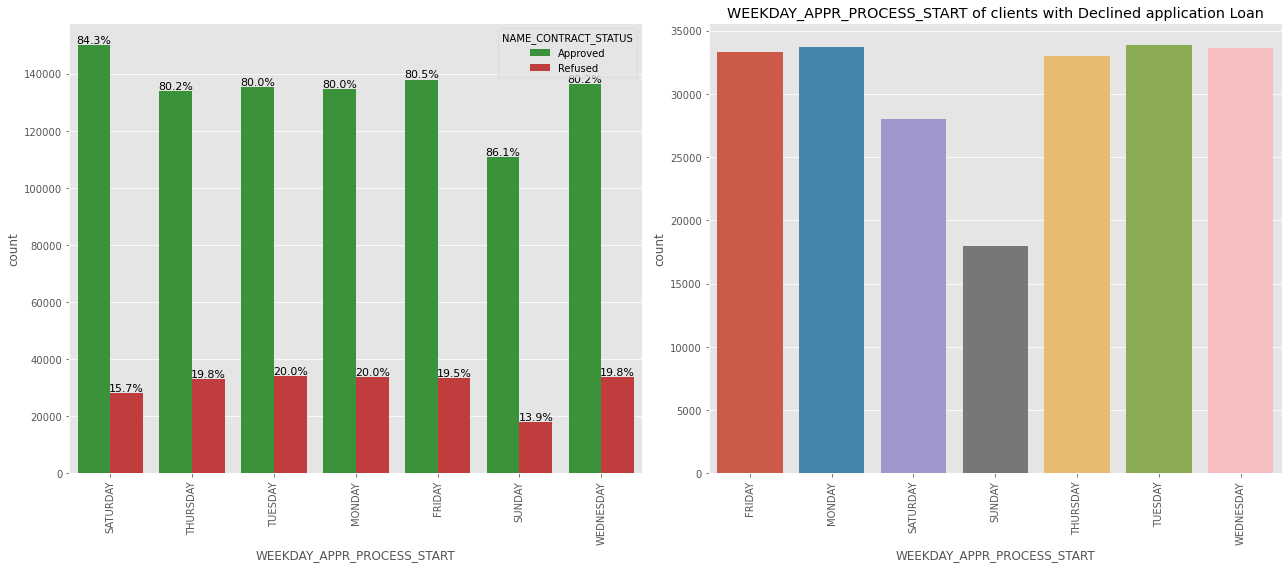

Approved Loan percentage for each class in FLAG_LAST_APPL_PER_CONTRACT: 

Y    100.0
N      0.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64 

*************************
Declined Loan percentage for each class in FLAG_LAST_APPL_PER_CONTRACT: 

Y    18.5
N     0.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64 

*************************


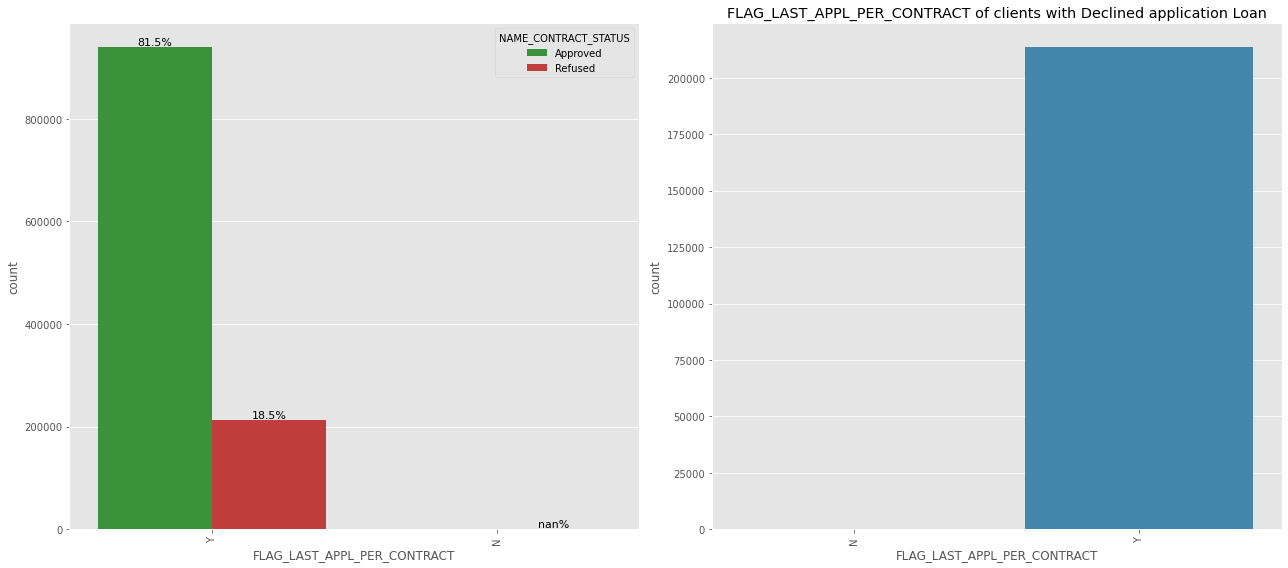

Approved Loan percentage for each class in NAME_PAYMENT_TYPE: 

Cash through the bank                        99.2
Non-cash from your account                    0.7
Cashless from the account of the employer     0.1
Name: NAME_PAYMENT_TYPE, dtype: float64 

*************************
Declined Loan percentage for each class in NAME_PAYMENT_TYPE: 

Cash through the bank                        18.4
Non-cash from your account                    0.1
Cashless from the account of the employer     0.0
Name: NAME_PAYMENT_TYPE, dtype: float64 

*************************


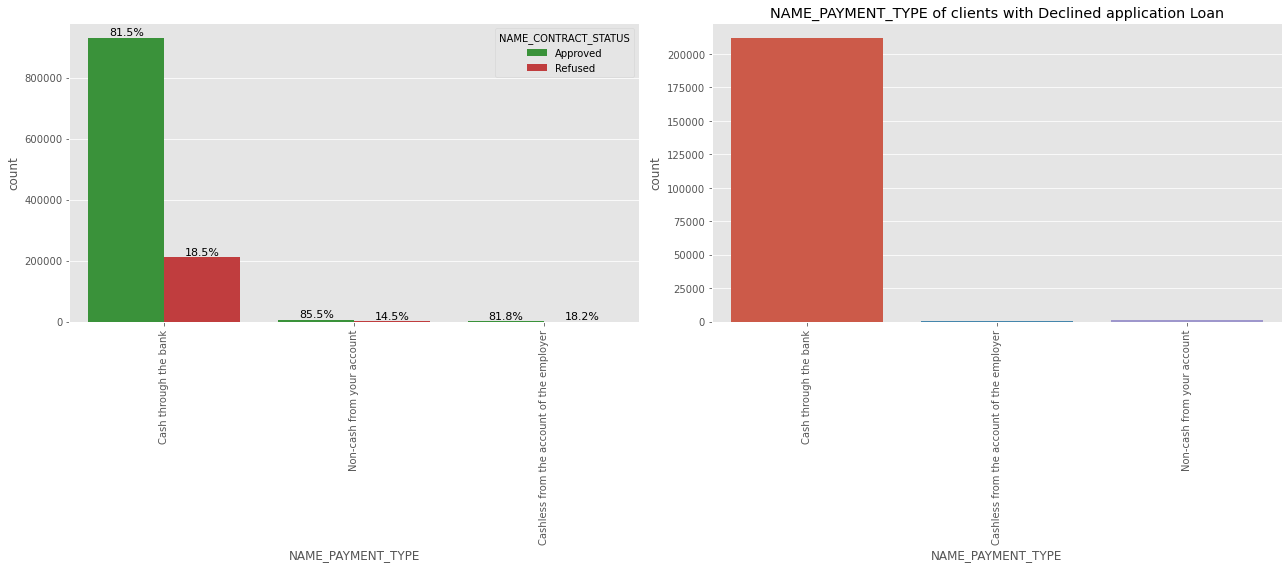

Approved Loan percentage for each class in NAME_CLIENT_TYPE: 

Repeater     66.7
New          24.8
Refreshed     8.5
Name: NAME_CLIENT_TYPE, dtype: float64 

*************************
Declined Loan percentage for each class in NAME_CLIENT_TYPE: 

Repeater     16.6
New           1.0
Refreshed     0.9
Name: NAME_CLIENT_TYPE, dtype: float64 

*************************


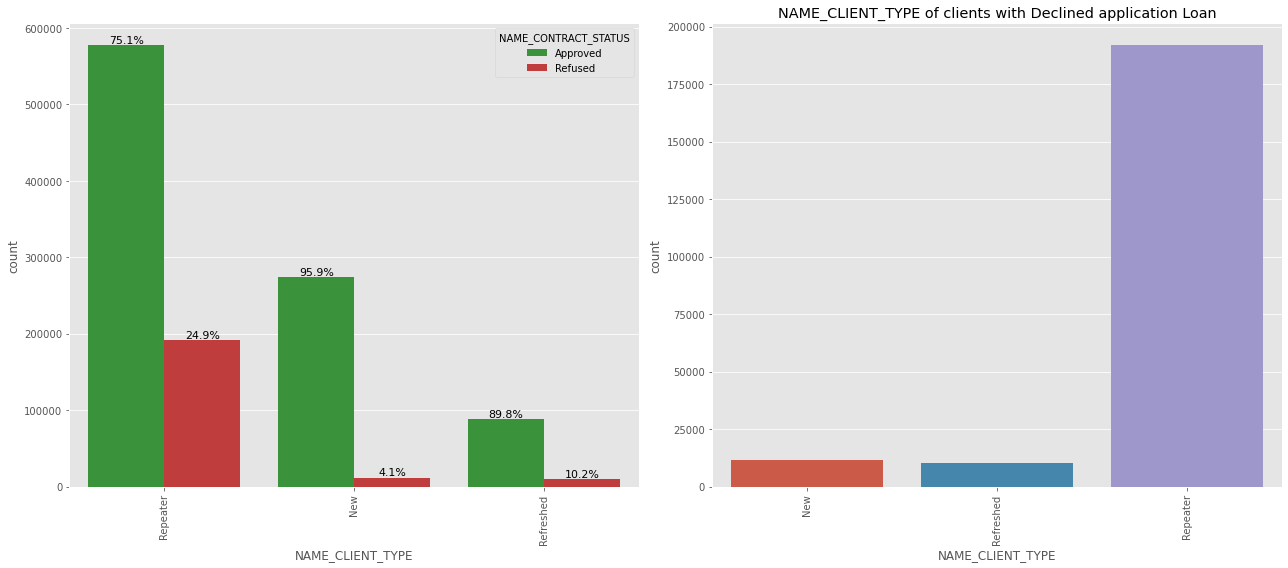

Approved Loan percentage for each class in NAME_PORTFOLIO: 

POS     60.8
Cash    39.2
Cars     0.0
Name: NAME_PORTFOLIO, dtype: float64 

*************************
Declined Loan percentage for each class in NAME_PORTFOLIO: 

Cash    12.1
POS      6.4
Cars     0.0
Name: NAME_PORTFOLIO, dtype: float64 

*************************


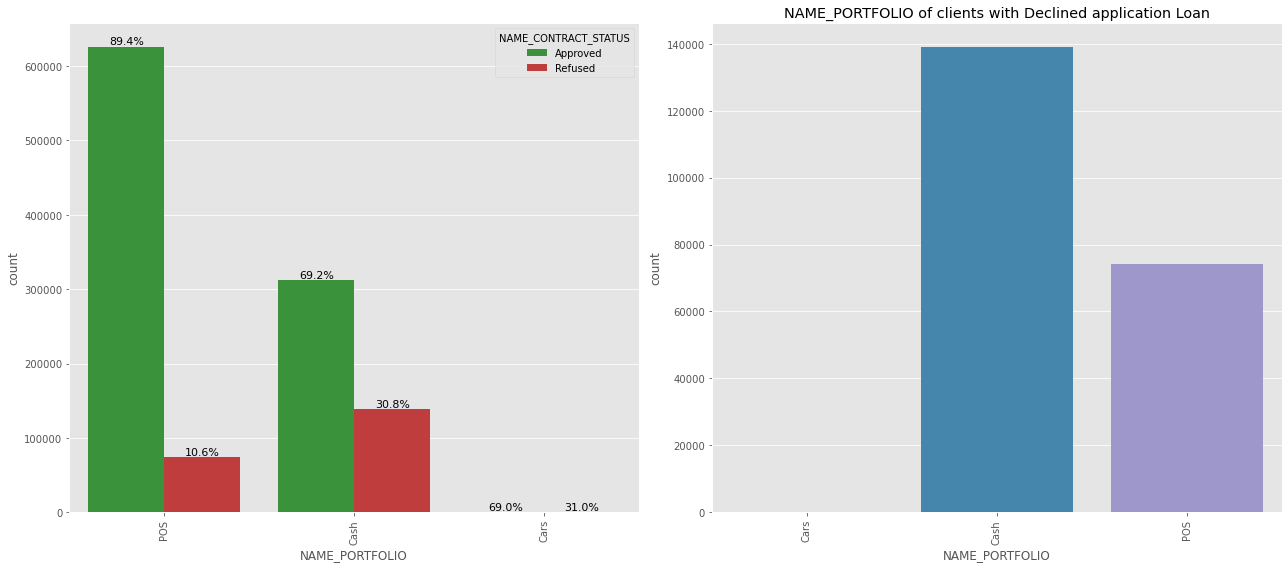

Approved Loan percentage for each class in CHANNEL_TYPE: 

Country-wide                  38.2
Credit and cash offices       29.2
Stone                         17.8
Regional / Local               8.8
AP+ (Cash loan)                3.2
Contact center                 2.3
Channel of corporate sales     0.4
Car dealer                     0.0
Name: CHANNEL_TYPE, dtype: float64 

*************************
Declined Loan percentage for each class in CHANNEL_TYPE: 

Credit and cash offices       8.6
Country-wide                  4.9
Stone                         1.8
AP+ (Cash loan)               1.2
Contact center                1.0
Regional / Local              0.8
Channel of corporate sales    0.2
Car dealer                    0.0
Name: CHANNEL_TYPE, dtype: float64 

*************************


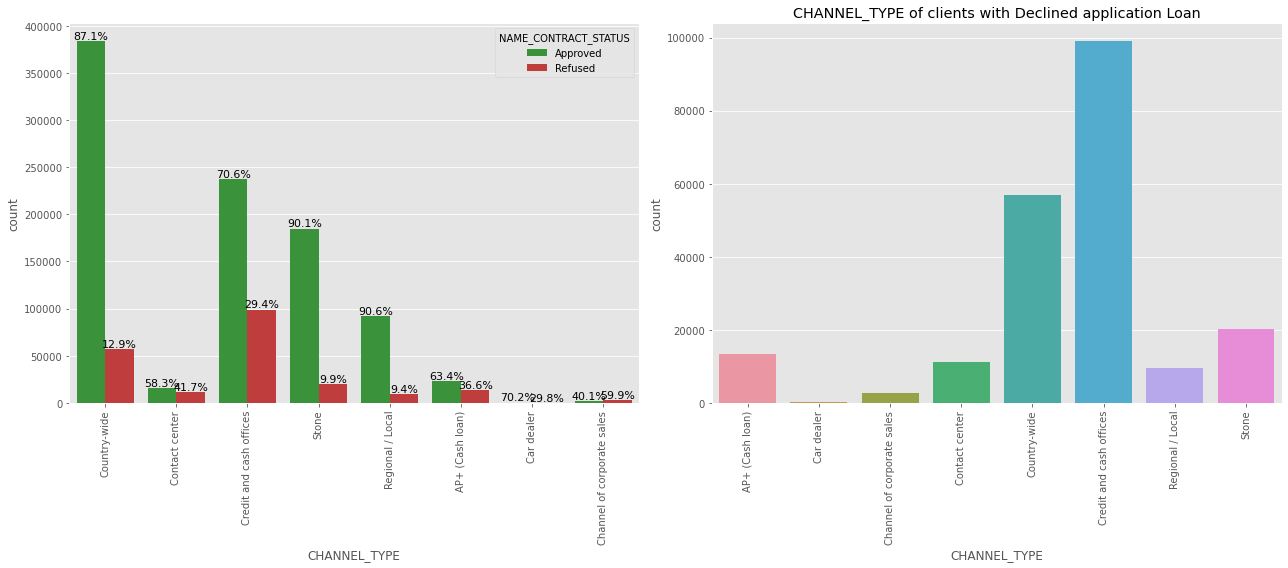

Approved Loan percentage for each class in NAME_YIELD_GROUP: 

middle        34.1
high          30.6
low_normal    27.5
low_action     7.9
Name: NAME_YIELD_GROUP, dtype: float64 

*************************
Declined Loan percentage for each class in NAME_YIELD_GROUP: 

low_normal    6.1
middle        6.0
high          4.6
low_action    1.8
Name: NAME_YIELD_GROUP, dtype: float64 

*************************


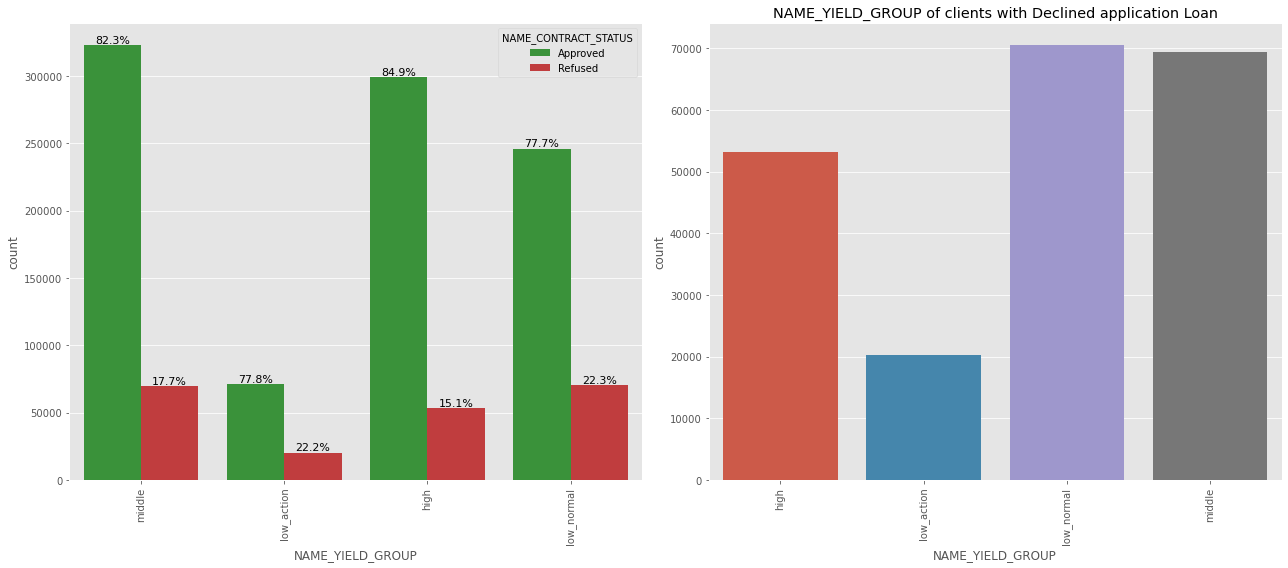

Approved Loan percentage for each class in PRODUCT_COMBINATION: 

POS household with interest       22.5
POS mobile with interest          17.2
Cash X-Sell: middle               12.3
Cash X-Sell: low                  10.9
POS industry with interest         8.5
POS household without interest     7.2
Cash Street: high                  5.2
Cash X-Sell: high                  5.1
Cash Street: middle                3.0
Cash Street: low                   2.8
POS mobile without interest        2.0
POS other with interest            2.0
POS industry without interest      1.1
POS others without interest        0.2
Cash                               0.0
Card Street                        0.0
Name: PRODUCT_COMBINATION, dtype: float64 

*************************
Declined Loan percentage for each class in PRODUCT_COMBINATION: 

Cash X-Sell: low                  3.6
POS household with interest       2.3
Cash X-Sell: middle               2.2
POS mobile with interest          2.1
Cash Street: low      

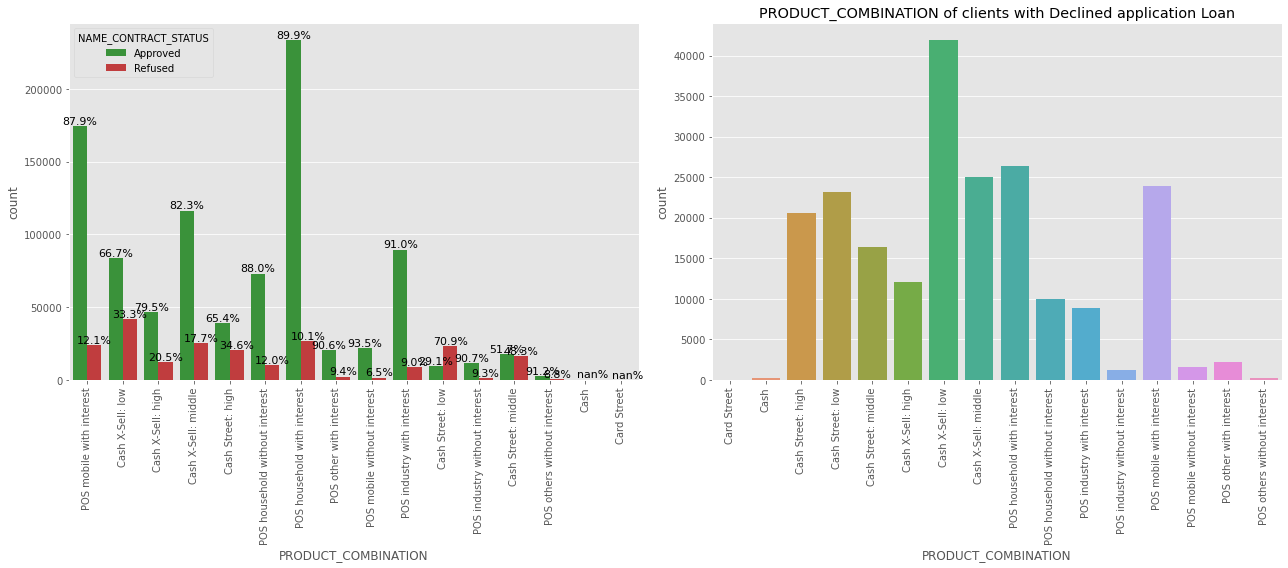

Approved Loan percentage for each class in PERIOD_APPR_PROCESS_START: 

Afternoon    47.3
Morning      38.3
Evening      13.2
Night         1.1
Name: PERIOD_APPR_PROCESS_START, dtype: float64 

*************************
Declined Loan percentage for each class in PERIOD_APPR_PROCESS_START: 

Afternoon    8.6
Morning      7.4
Evening      2.3
Night        0.2
Name: PERIOD_APPR_PROCESS_START, dtype: float64 

*************************


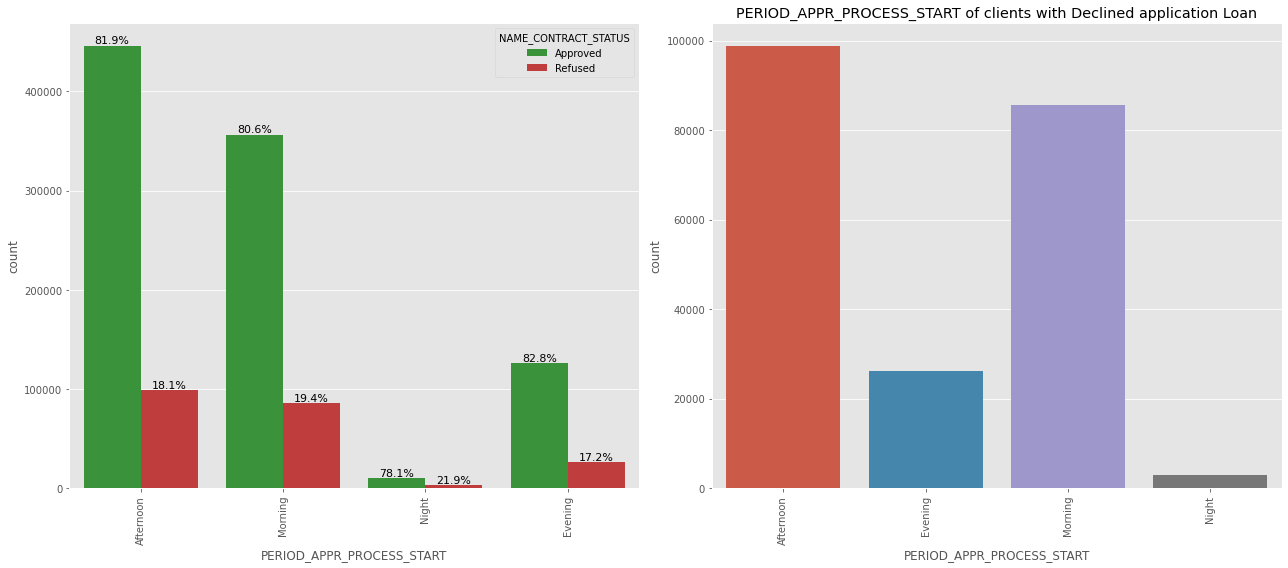

Approved Loan percentage for each class in ANNUITY_CAT: 

low       47.1
High      24.3
V.low     15.2
V.high    13.4
Name: ANNUITY_CAT, dtype: float64 

*************************
Declined Loan percentage for each class in ANNUITY_CAT: 

low       6.8
High      5.8
V.high    4.5
V.low     1.4
Name: ANNUITY_CAT, dtype: float64 

*************************


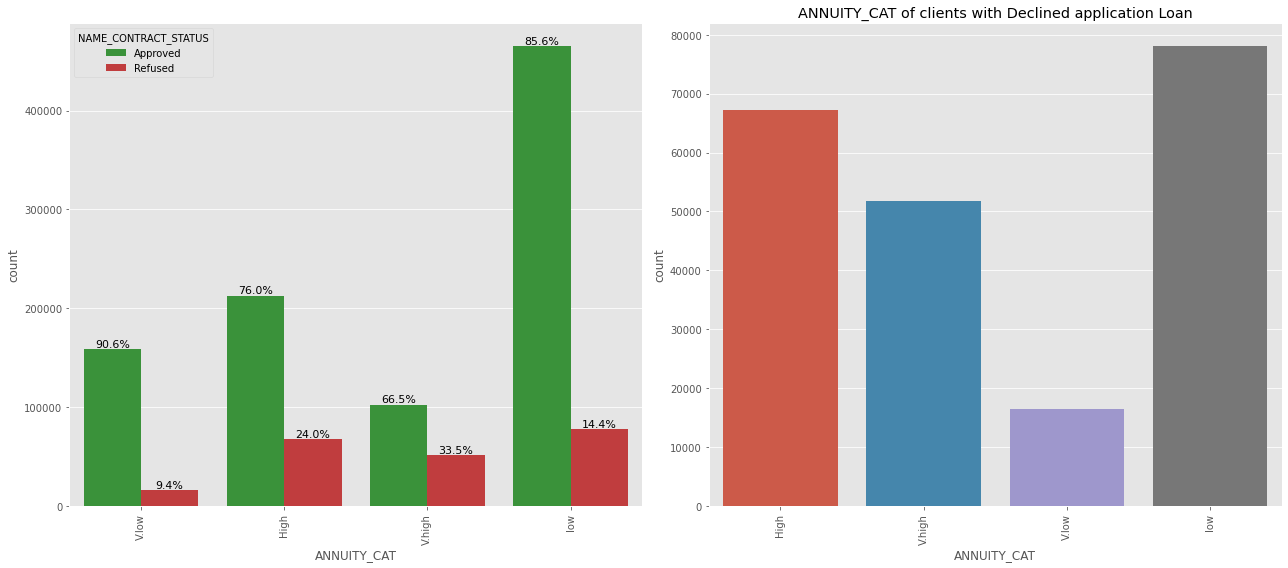

Approved Loan percentage for each class in CREDIT_CAT: 

Medium    31.5
V.low     24.0
Low       22.2
V.high    14.0
High       8.3
Name: CREDIT_CAT, dtype: float64 

*************************
Declined Loan percentage for each class in CREDIT_CAT: 

V.high    5.9
Medium    5.4
Low       2.5
V.low     2.4
High      2.4
Name: CREDIT_CAT, dtype: float64 

*************************


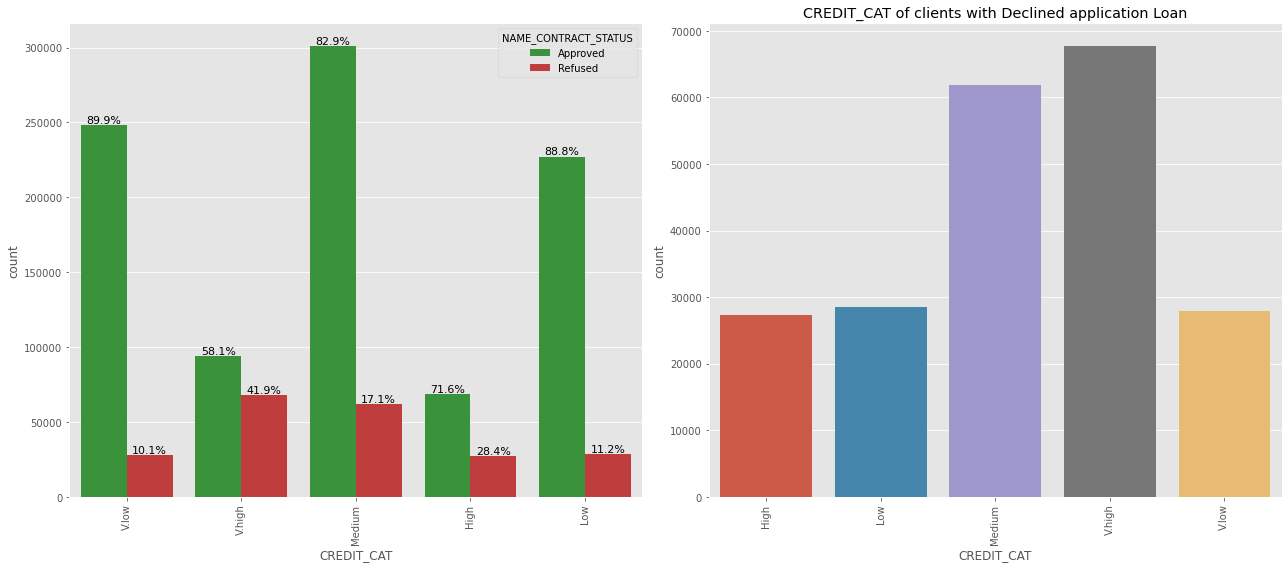

Approved Loan percentage for each class in APPLICATION_CAT: 

Medium    32.2
V.low     23.4
Low       23.4
V.high    11.5
High       9.5
Name: APPLICATION_CAT, dtype: float64 

*************************
Declined Loan percentage for each class in APPLICATION_CAT: 

Medium    5.6
V.high    4.9
High      2.9
Low       2.6
V.low     2.4
Name: APPLICATION_CAT, dtype: float64 

*************************


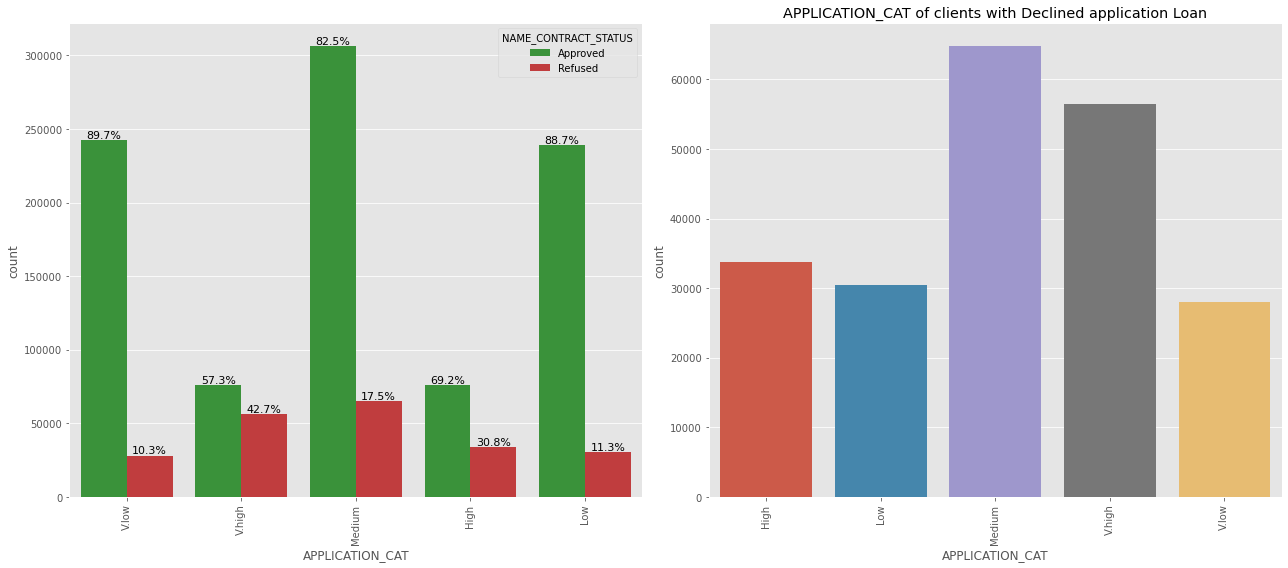

Approved Loan percentage for each class in GOODS_CAT: 

Medium    32.2
V.low     23.4
Low       23.4
V.high    11.5
High       9.5
Name: GOODS_CAT, dtype: float64 

*************************
Declined Loan percentage for each class in GOODS_CAT: 

Medium    5.6
V.high    4.9
High      2.9
Low       2.6
V.low     2.4
Name: GOODS_CAT, dtype: float64 

*************************


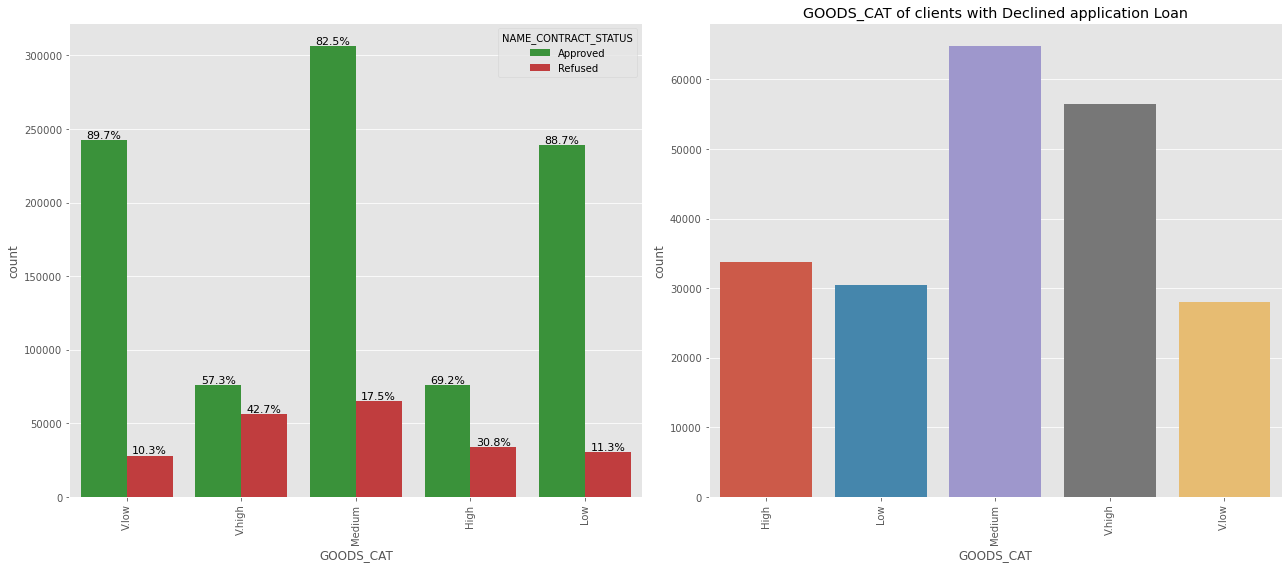

In [83]:
for col in df.select_dtypes('object').drop('NAME_CONTRACT_STATUS', axis = 1).columns.to_list() :
    categorical_univariant_analysis(col)


## Multivariate Analysis

In [84]:
def bivariante_scatter(x,y, graph_hue):
    
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,3)
    
    palette  = ['tab:green', 'tab:red']
    
    fig1 = sns.scatterplot(
        data = df,
        x = x,
        y=y,
        hue = 'NAME_CONTRACT_STATUS',
        palette= palette
    )
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    
    
    plt.title(f'{y} vs {x} with {graph_hue} hue')
    
    plt.subplot(2,2,2)
    sns.scatterplot(
        data = refused_df,
        x = x,
        y=y,
        hue = graph_hue,
    )
    
    plt.title(f'{y} vs {x} for Refused Contracts ')
    #plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.subplot(2,2,1)
    
    
    sns.scatterplot(
        data = approved_df,
        x = x,
        y=y,
        hue = graph_hue,
    )
    
    plt.title(f'{y} vs {x} for Approved Contracts ')
    #plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
    
    plt.show()

In [85]:
def bivariate_bar(x,y, graph_hue):
    
    plt.figure(figsize= (18,8))
    plt.subplot(1,2,1)
    palette  = ['tab:green', 'tab:red']
    
    sns.barplot(
        data = df,
        x = x,
        y = y,
        hue = graph_hue,
        palette= palette
        
    )
    
    plt.title(f'{y} vs {x} with {graph_hue} hue')
    plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    
    
    
    plt.subplot(1,2,2)
    sns.barplot(
        data = approved_df,
        x = x,
        y = y,
        
    )

    plt.title(f'{y} vs {x} for accepted contracts ')
    plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    
    plt.show()

From the below graph we can deduce that:
- Most Refused contracts have *very low* Credit Category with very high Interest Rate (aboved 50%), Meanwhile the Accepted contracts in the same credit Category their Interest Rate doesn't excced 25%

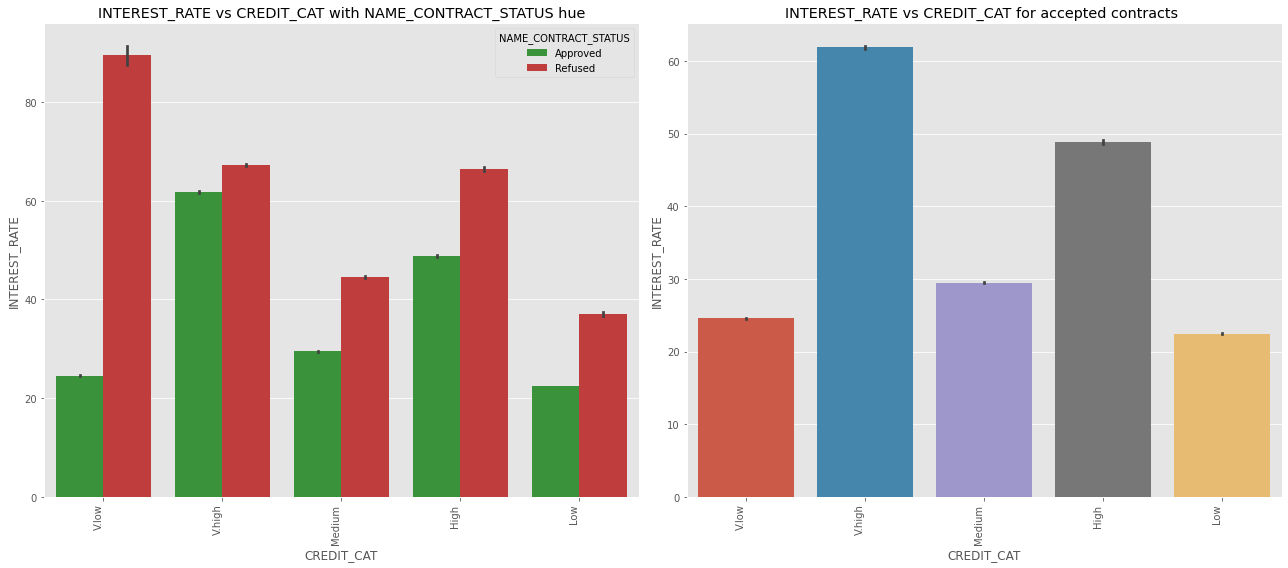

In [86]:
bivariate_bar(x = 'CREDIT_CAT', y = 'INTEREST_RATE', graph_hue='NAME_CONTRACT_STATUS')

From the below graph we can deduce that:
- Most Refused contracts have *very low* Goods Category with very high Interest Rate (aboved 50%), Meanwhile the Accepted contracts in the same Goods Category their Interest Rate doesn't excced 25%

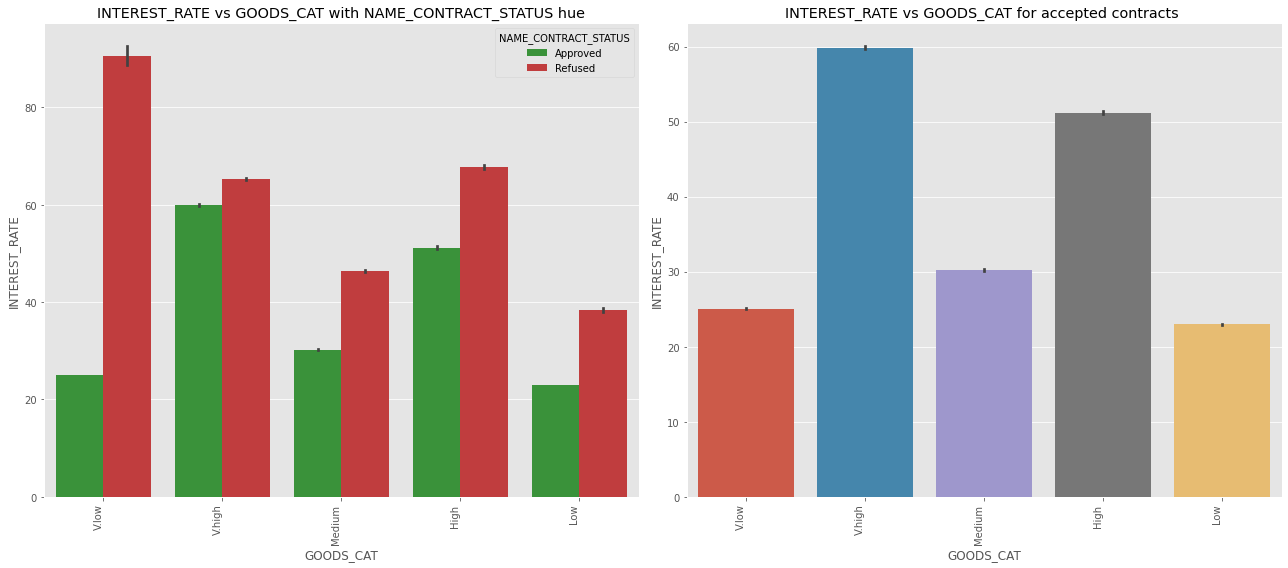

In [87]:
bivariate_bar(x = 'GOODS_CAT', y = 'INTEREST_RATE',graph_hue='NAME_CONTRACT_STATUS')

From the below graph we can deduce that:
- Most Refused contracts in the *low* Annuity Category has a Highh Interest Rate (above 55%) Meanwhile the Accepted contracts in the same Annuity Category have a Relatively low Interest Rate (doesn't exceed 30%)

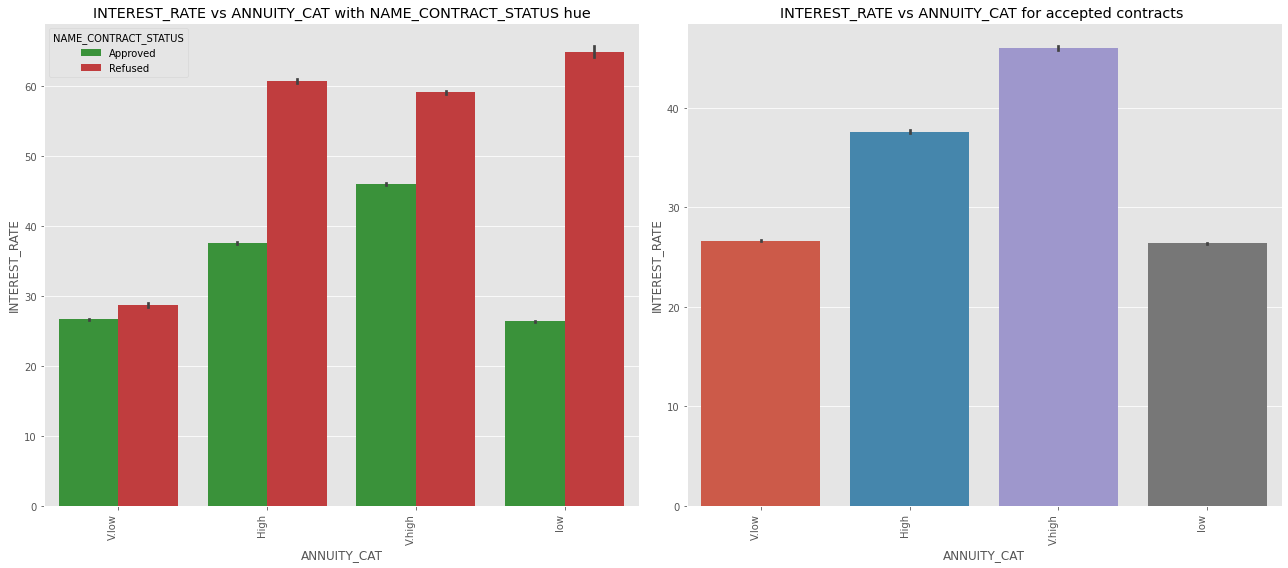

In [88]:
bivariate_bar(x = 'ANNUITY_CAT', y = 'INTEREST_RATE',graph_hue='NAME_CONTRACT_STATUS')

From the below graph, we can deduce that:
- Most Refused contracts in the *very high* Credit Category have exceeded 40 Payment Counts. Meanwhile, the Approved contracts in the same category have approximately 35 Payment Counts 

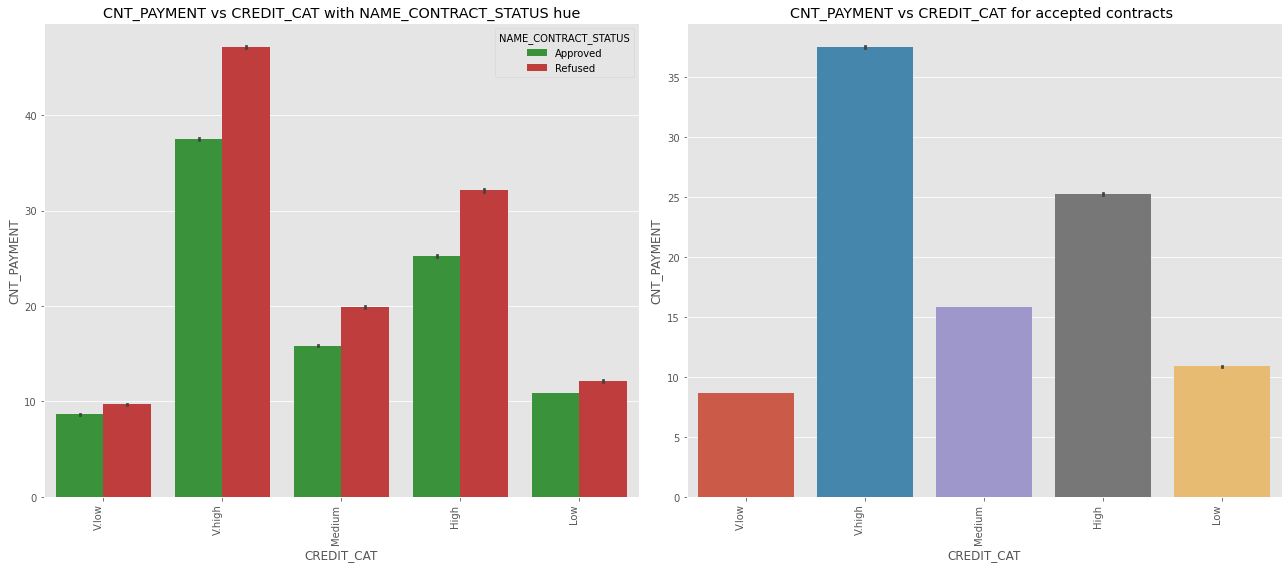

In [89]:
bivariate_bar(x ='CREDIT_CAT', y = 'CNT_PAYMENT', graph_hue='NAME_CONTRACT_STATUS')

From the below graph, we can deduce that:
- Refused contracts in the *very high* Credit Category have  40 Payment Counts. Meanwhile, the Approved contracts in the same category have approximately 26 Payment Counts 

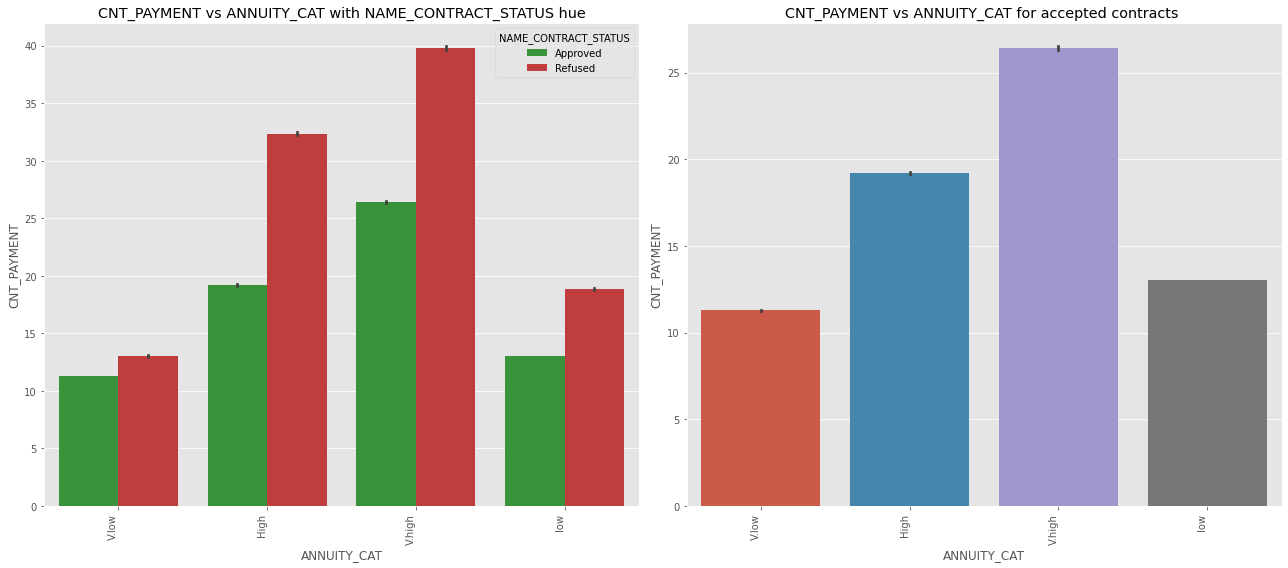

In [90]:
bivariate_bar(x ='ANNUITY_CAT', y = 'CNT_PAYMENT', graph_hue='NAME_CONTRACT_STATUS')

In [91]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'PERIOD_APPR_PROCESS_START', 'ANNUITY_CAT', 'CREDIT_CAT', 'APPLICATION_CAT', 'GOODS_CAT'], dtype='object')

From the below graph, we can deduce tha:
- Refused Contracts in the *Very high* Annuity Category had Goods Price exceeded 1M. Meanwhile the Approved Contracts had approximately 700000 Goods Price

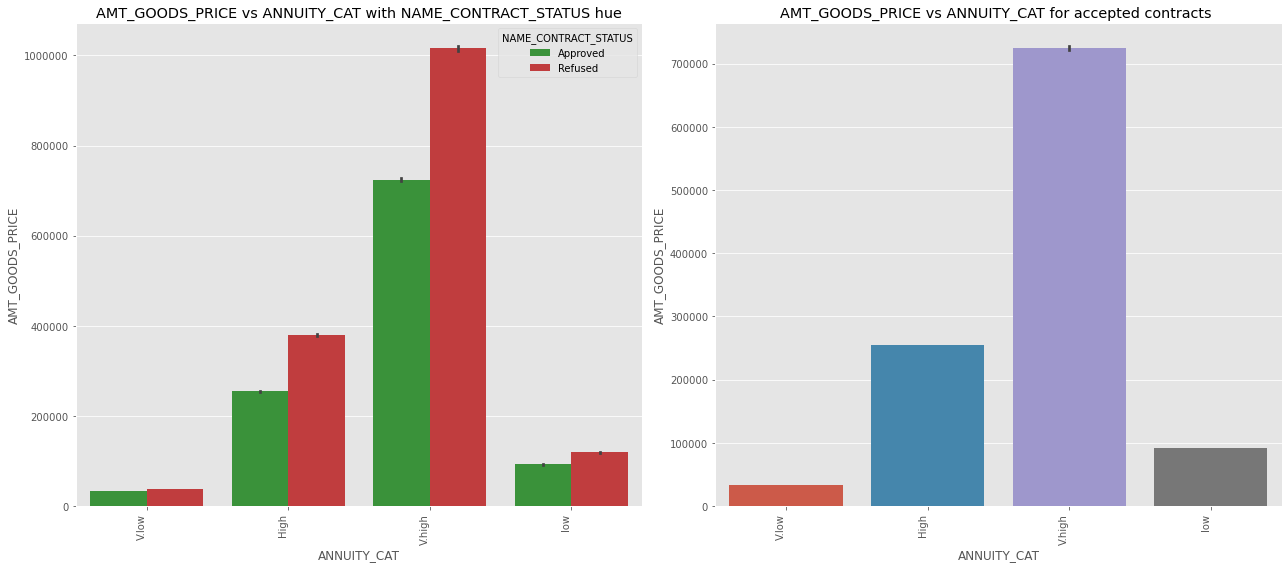

In [92]:
bivariate_bar(x ='ANNUITY_CAT', y = 'AMT_GOODS_PRICE', graph_hue='NAME_CONTRACT_STATUS')

From the below graph, we can deduce that:
- Refused Contracts in the *Car delar* Credit Category 1.2+M. Meanwhile the Approved Contracts had approximately 1M Goods Price

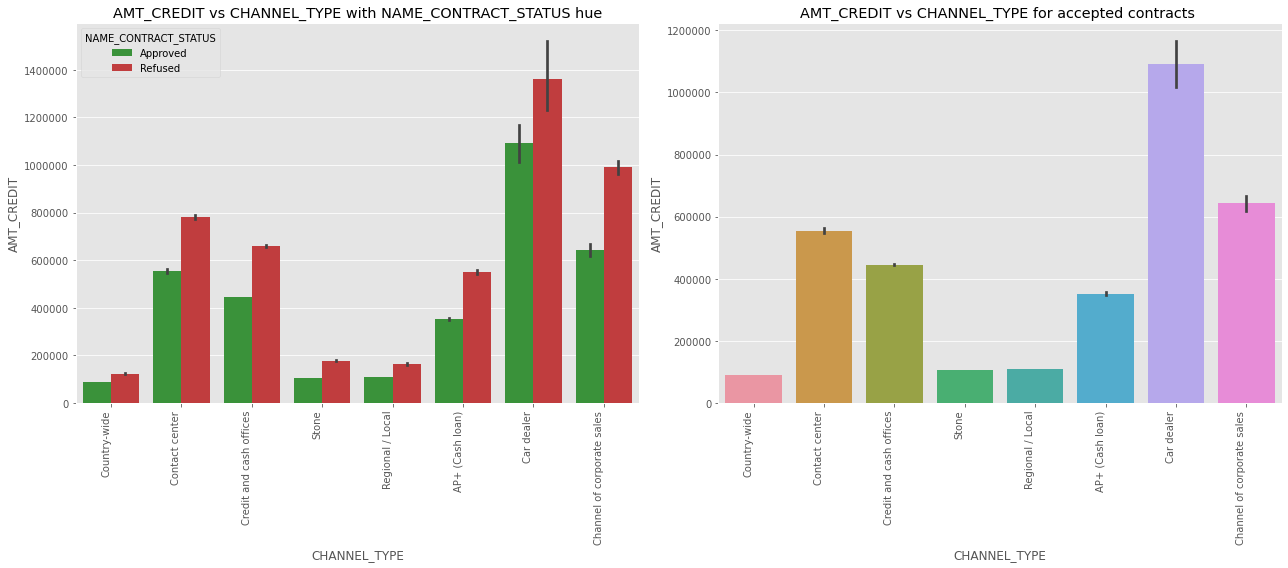

In [93]:
bivariate_bar(x = 'CHANNEL_TYPE', y = 'AMT_CREDIT', graph_hue= 'NAME_CONTRACT_STATUS' )

From the below graph we can conclude that:
- In Refused contracts *low_action* group  most of them have about 850k in Credit Amount. While in Approved contracts it has about 250k
- In Refused contracts *low_normal* group most of them have about 650k in Credit Amount. While in Approved contracts it has about 280k

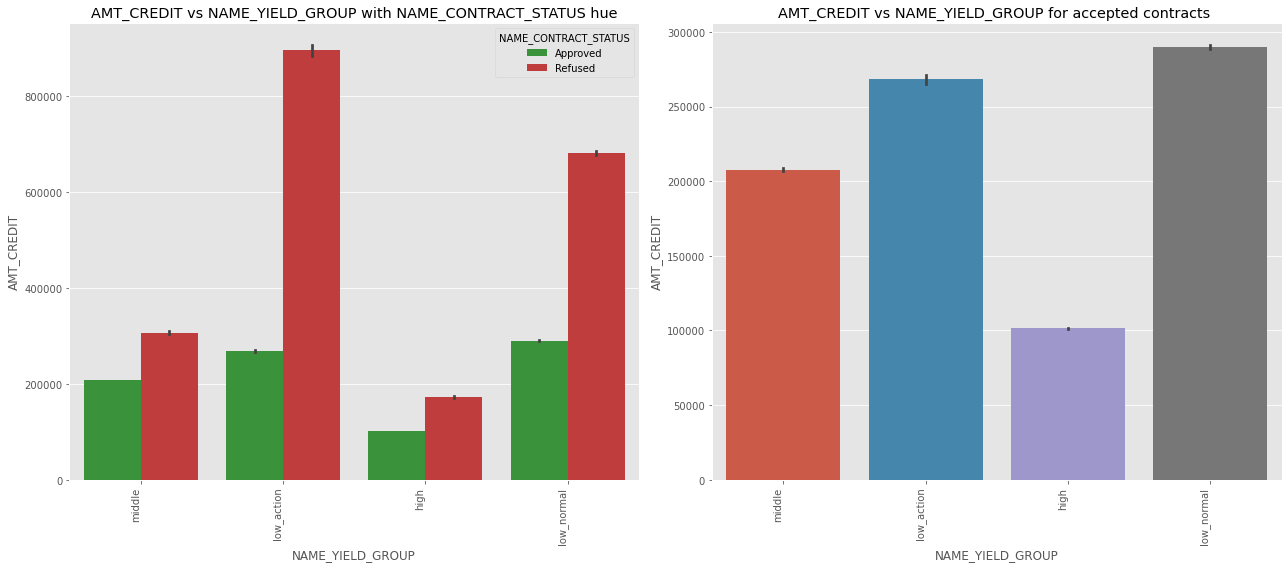

In [94]:
bivariate_bar(x = 'NAME_YIELD_GROUP',y = 'AMT_CREDIT', graph_hue= 'NAME_CONTRACT_STATUS')

From the below graph, we can conclude that:
- In Refused contracts *Repeater* clients  most of their average are about 450k in Credit Amount. While in Approved contracts it have about 250k
- In Refused contracts *Refreshed* clients most of their average are about 400k in Credit Amount. While in Approved contracts it has about 200k
- In Approved contracts most *New Clients* have approximately 100k in Credit amount 

In [95]:
refused_df[refused_df['NAME_CLIENT_TYPE'] == 'Refreshed']['AMT_CREDIT'].mean()

443644.155754858

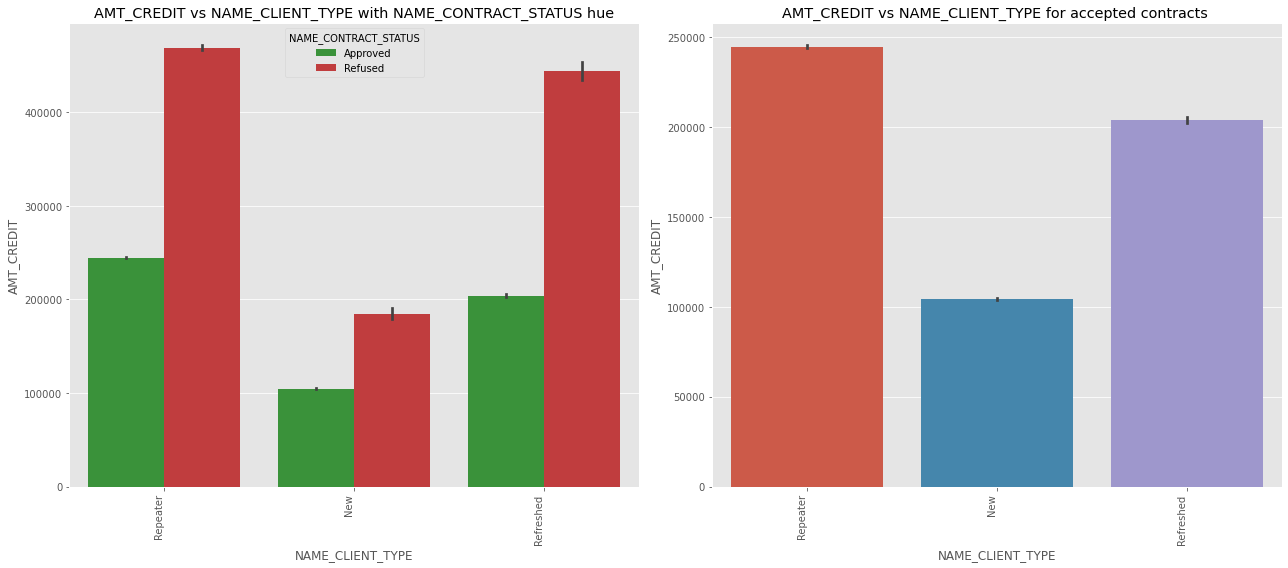

In [96]:
bivariate_bar(x = 'NAME_CLIENT_TYPE',y = 'AMT_CREDIT', graph_hue= 'NAME_CONTRACT_STATUS')

In the below graph:
- All the Approved Contracts that have credit more than or equal 3 Millions have *Interest Rate* from approx 25 to 125
- Also most Approved Contracts don't exceed 125%  *Interest Rate* 

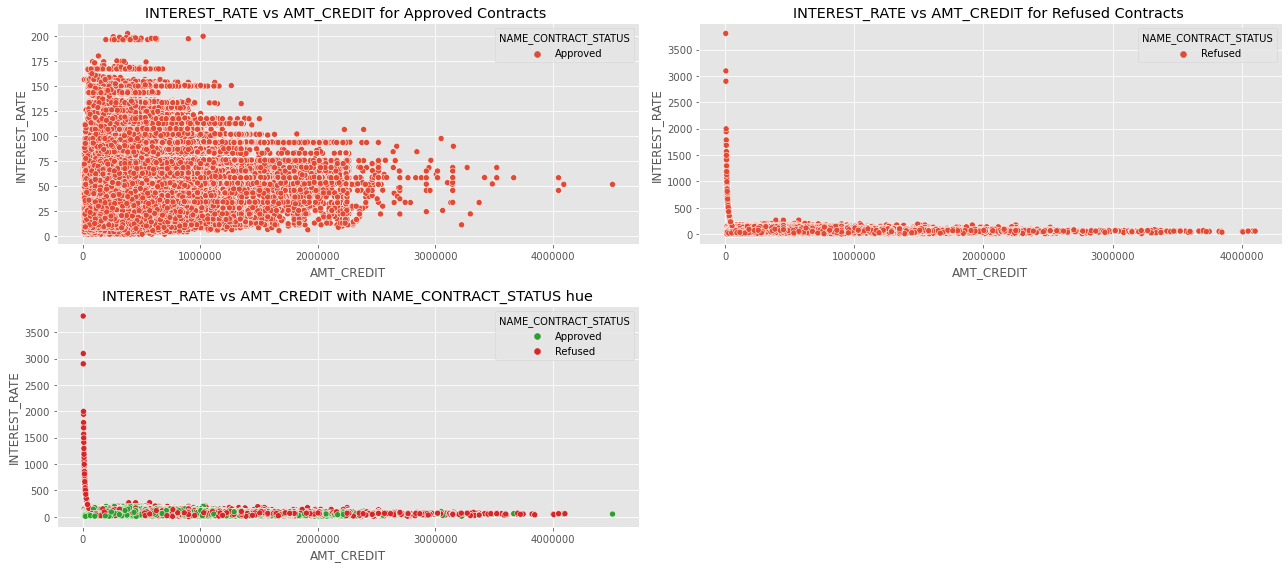

In [98]:
bivariante_scatter(x = 'AMT_CREDIT', y = 'INTEREST_RATE', graph_hue='NAME_CONTRACT_STATUS')

From the below graph we can conclude that:
- In both Refused and Accepted contracts, most annuity amount doesn't exceed 200000 no matter how much the credit amount was. Above 200000 annuity amount considered Outlier
- In Approved contracts most of them that have more than 2M+ in credit amount have annuity amount between 50000 to 100000. 
- Also in Approved contracts it's rare to find one that has cerdit more than or equal approximatlly 2.3M. so those that have that kind of amount considered outlier 

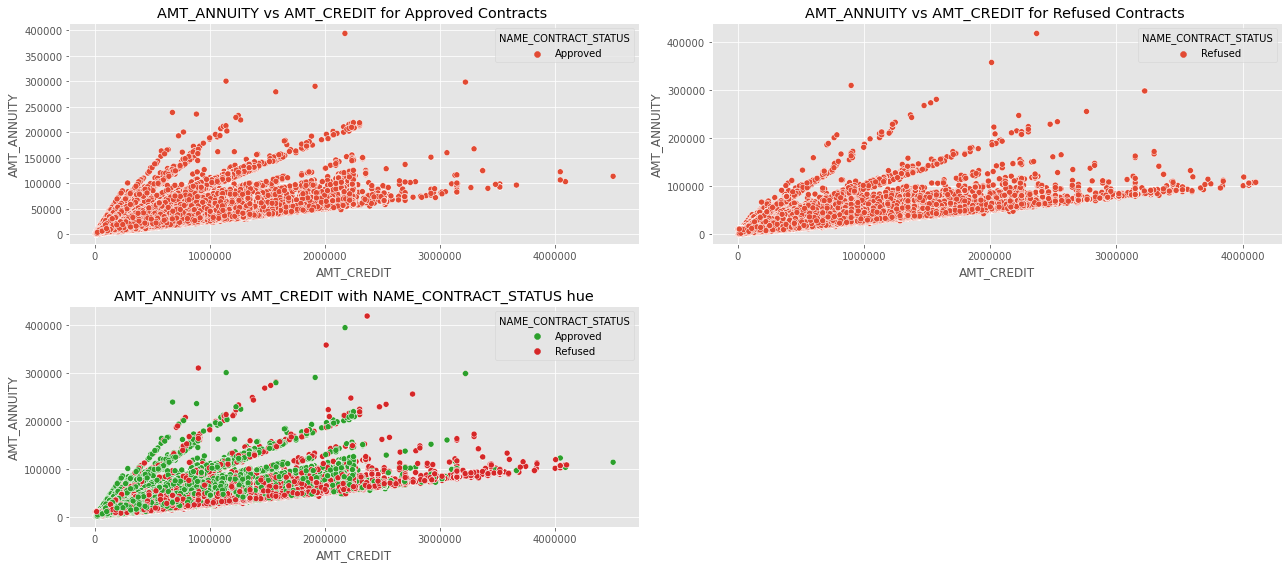

In [99]:
bivariante_scatter(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', graph_hue='NAME_CONTRACT_STATUS')

In [100]:
min(approved_df['CNT_PAYMENT'].unique().tolist())

3

In [101]:
min(approved_df['INTEREST_RATE'].unique().tolist())

1.73

From the below graph, we can conclude that:
- In Approved contracts, we have count payments that range from 3 to 20 payments that have approximately from 1 to 50 *Interest Rate*
- The Approved contracts that has Interest rate greater than 75 excceds 30 payments / the client pays the loan for more than 2 years and half 

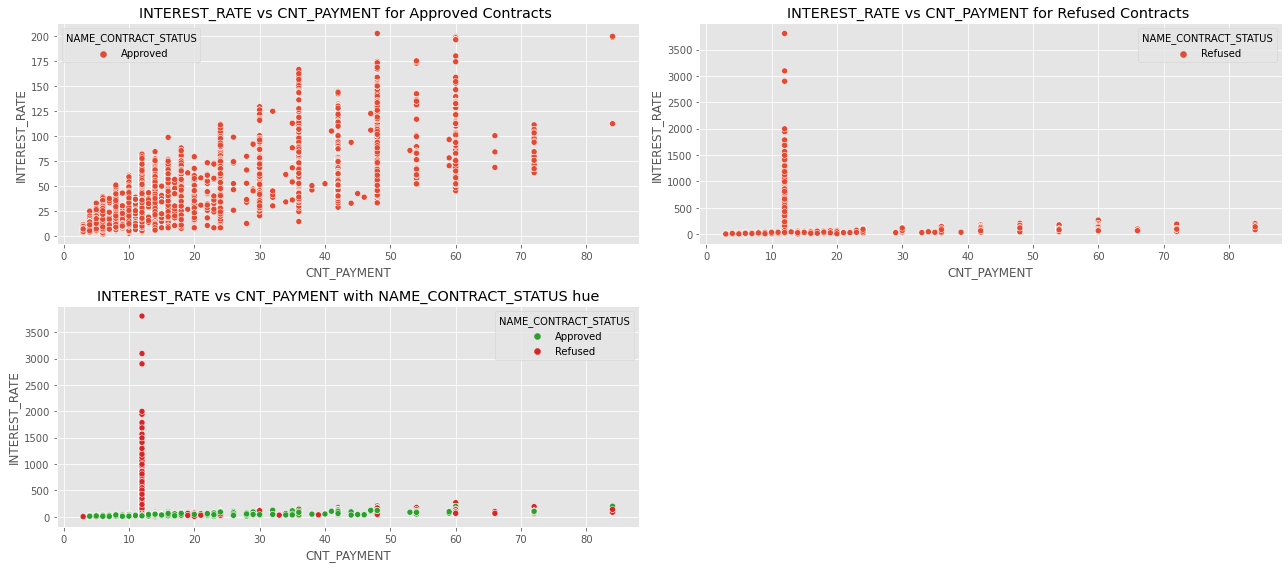

In [102]:
bivariante_scatter(y = 'INTEREST_RATE', x = 'CNT_PAYMENT', graph_hue='NAME_CONTRACT_STATUS')

In [103]:
df.drop(['WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT'], axis = 1, inplace=True)

In [104]:
df.drop(['ANNUITY_CAT',
        'APPLICATION_CAT',
        'CREDIT_CAT',
        'GOODS_CAT',
        'PERIOD_APPR_PROCESS_START'], axis = 1, inplace=True)

In [105]:
df.rename(
    columns= {
        'NAME_CONTRACT_STATUS':  'APPROVED_CONTRACT'
    }, 
    inplace= True
)

In [106]:
df['APPROVED_CONTRACT'].value_counts()

Approved    939005
Refused     213432
Name: APPROVED_CONTRACT, dtype: int64

In [107]:
df.replace({
    'APPROVED_CONTRACT': {
        
        'Approved': 1,
        'Refused': 0
    }},
    
    inplace= True
)

In [108]:
df['APPROVED_CONTRACT'].value_counts()

1    939005
0    213432
Name: APPROVED_CONTRACT, dtype: int64

# Train Test Split

In [109]:
X = df.drop(['SK_ID_CURR','SK_ID_PREV','APPROVED_CONTRACT'], axis=1)
y = df['APPROVED_CONTRACT']

In [110]:
df['APPROVED_CONTRACT'].value_counts()

1    939005
0    213432
Name: APPROVED_CONTRACT, dtype: int64

In [111]:
X.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE      3
NAME_PAYMENT_TYPE       3
NAME_CLIENT_TYPE        3
NAME_PORTFOLIO          3
CHANNEL_TYPE            8
NAME_YIELD_GROUP        4
PRODUCT_COMBINATION    16
dtype: int64

# Preprocessing 

## Encoding

In [112]:
X = pd.get_dummies(
    data= X,
    columns=[
        'NAME_CLIENT_TYPE',
        'NAME_CONTRACT_TYPE',
        'NAME_PAYMENT_TYPE',
        'NAME_PORTFOLIO'
])

In [113]:
label_enc  = LabelEncoder()

In [114]:
X['CHANNEL_TYPE']

0                     Country-wide
1                   Contact center
2          Credit and cash offices
3          Credit and cash offices
4          Credit and cash offices
                    ...           
1670209                      Stone
1670210                      Stone
1670211               Country-wide
1670212            AP+ (Cash loan)
1670213            AP+ (Cash loan)
Name: CHANNEL_TYPE, Length: 1152437, dtype: object

In [115]:
X[['CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']].shape

(1152437, 3)

In [116]:
X['CHANNEL_TYPE'].value_counts()

Country-wide                  440303
Credit and cash offices       336215
Stone                         205159
Regional / Local              101727
AP+ (Cash loan)                36994
Contact center                 27003
Channel of corporate sales      4630
Car dealer                       406
Name: CHANNEL_TYPE, dtype: int64

In [117]:
X['NAME_YIELD_GROUP'].value_counts()

middle        392508
high          352259
low_normal    316594
low_action     91076
Name: NAME_YIELD_GROUP, dtype: int64

In [118]:
X['PRODUCT_COMBINATION'].value_counts()

POS household with interest       259635
POS mobile with interest          198377
Cash X-Sell: middle               141290
Cash X-Sell: low                  125596
POS industry with interest         98298
POS household without interest     82896
Cash Street: high                  59484
Cash X-Sell: high                  58548
Cash Street: middle                34020
Cash Street: low                   32748
POS mobile without interest        23423
POS other with interest            22787
POS industry without interest      12601
POS others without interest         2555
Cash                                 178
Card Street                            1
Name: PRODUCT_COMBINATION, dtype: int64

In [119]:
X['CHANNEL_TYPE'] = label_enc.fit_transform(X['CHANNEL_TYPE'])

In [120]:
X['NAME_YIELD_GROUP'] = label_enc.fit_transform(X['NAME_YIELD_GROUP'])

In [121]:
X['PRODUCT_COMBINATION'] = label_enc.fit_transform(X['PRODUCT_COMBINATION'])

In [122]:
X['PRODUCT_COMBINATION'].value_counts()

8     259635
12    198377
7     141290
6     125596
10     98298
9      82896
2      59484
5      58548
4      34020
3      32748
13     23423
14     22787
11     12601
15      2555
1        178
0          1
Name: PRODUCT_COMBINATION, dtype: int64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [124]:
y_train.value_counts()

1    657154
0    149551
Name: APPROVED_CONTRACT, dtype: int64

In [125]:
y_test.value_counts()

1    281851
0     63881
Name: APPROVED_CONTRACT, dtype: int64

# Feature Selection

In [126]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.07599601, 0.0518416 , 0.07083907, 0.05153846, 0.06769096,
       0.06590707, 0.04227091, 0.07109389, 0.05049902, 0.06664975,
       0.0913323 , 0.08214943, 0.04062232, 0.00360593, 0.08860269,
       0.04884507, 0.09121101, 0.00029345, 0.13304279, 0.00018421,
       0.00089989, 0.        , 0.04992024, 0.0903818 ])

In [127]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

NAME_PAYMENT_TYPE_Cash through the bank                        0.133043
AMT_INTEREST                                                   0.091332
NAME_CONTRACT_TYPE_Consumer loans                              0.091211
NAME_PORTFOLIO_POS                                             0.090382
NAME_CLIENT_TYPE_Repeater                                      0.088603
INTEREST_RATE                                                  0.082149
AMT_ANNUITY                                                    0.075996
PRODUCT_COMBINATION                                            0.071094
AMT_CREDIT                                                     0.070839
CHANNEL_TYPE                                                   0.067691
PAYMENT_MONTHS/YRS                                             0.066650
CNT_PAYMENT                                                    0.065907
AMT_APPLICATION                                                0.051842
AMT_GOODS_PRICE                                                0

<AxesSubplot:>

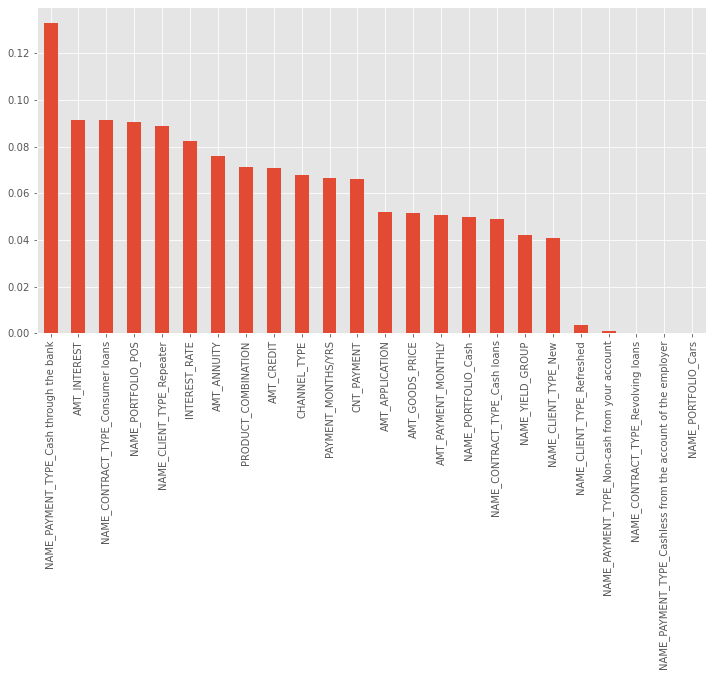

In [128]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12, 6))


In [129]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,APPROVED_CONTRACT,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_PAYMENT_MONTHLY,PAYMENT_MONTHS/YRS,AMT_INTEREST,INTEREST_RATE
0,2030495,271877,Consumer loans,1730,17145,17145,17145,1,Cash through the bank,Repeater,POS,Country-wide,12,middle,POS mobile with interest,144,1.0,3615,21.08
1,2802425,108129,Cash loans,25188,607500,679671,607500,1,Cash through the bank,Repeater,Cash,Contact center,36,low_action,Cash X-Sell: low,2099,3.0,227097,33.41
2,2523466,122040,Cash loans,15060,112500,136444,112500,1,Cash through the bank,Repeater,Cash,Credit and cash offices,12,high,Cash X-Sell: high,1255,1.0,44276,32.45
3,2819243,176158,Cash loans,47041,450000,470790,450000,1,Cash through the bank,Repeater,Cash,Credit and cash offices,12,middle,Cash X-Sell: middle,3920,1.0,93702,19.90
4,1784265,202054,Cash loans,31924,337500,404055,337500,0,Cash through the bank,Repeater,Cash,Credit and cash offices,24,high,Cash Street: high,2660,2.0,362121,89.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704,267295,311400,267295,1,Cash through the bank,Refreshed,POS,Stone,30,low_normal,POS industry with interest,1225,2.5,129720,41.66
1670210,2357031,334635,Consumer loans,6622,87750,64291,87750,1,Cash through the bank,New,POS,Stone,12,middle,POS industry with interest,551,1.0,15173,23.60
1670211,2659632,249544,Consumer loans,11520,105237,102523,105237,1,Cash through the bank,Repeater,POS,Country-wide,10,low_normal,POS household with interest,960,0.1,12677,12.37
1670212,2785582,400317,Cash loans,18821,180000,191880,180000,1,Cash through the bank,Repeater,Cash,AP+ (Cash loan),12,low_normal,Cash X-Sell: low,1568,1.0,33972,17.70


In [130]:
print(df.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'APPROVED_CONTRACT', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'AMT_PAYMENT_MONTHLY', 'PAYMENT_MONTHS/YRS', 'AMT_INTEREST', 'INTEREST_RATE']


In [131]:
new_cols_names = {}

In [132]:
df.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).columns.tolist()

['NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'APPROVED_CONTRACT',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'AMT_PAYMENT_MONTHLY',
 'PAYMENT_MONTHS/YRS',
 'AMT_INTEREST',
 'INTEREST_RATE']

In [133]:
for i in df.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).columns.tolist():
    new_cols_names[i] = i + '_previousDF'

In [134]:
new_cols_names

{'NAME_CONTRACT_TYPE': 'NAME_CONTRACT_TYPE_previousDF',
 'AMT_ANNUITY': 'AMT_ANNUITY_previousDF',
 'AMT_APPLICATION': 'AMT_APPLICATION_previousDF',
 'AMT_CREDIT': 'AMT_CREDIT_previousDF',
 'AMT_GOODS_PRICE': 'AMT_GOODS_PRICE_previousDF',
 'APPROVED_CONTRACT': 'APPROVED_CONTRACT_previousDF',
 'NAME_PAYMENT_TYPE': 'NAME_PAYMENT_TYPE_previousDF',
 'NAME_CLIENT_TYPE': 'NAME_CLIENT_TYPE_previousDF',
 'NAME_PORTFOLIO': 'NAME_PORTFOLIO_previousDF',
 'CHANNEL_TYPE': 'CHANNEL_TYPE_previousDF',
 'CNT_PAYMENT': 'CNT_PAYMENT_previousDF',
 'NAME_YIELD_GROUP': 'NAME_YIELD_GROUP_previousDF',
 'PRODUCT_COMBINATION': 'PRODUCT_COMBINATION_previousDF',
 'AMT_PAYMENT_MONTHLY': 'AMT_PAYMENT_MONTHLY_previousDF',
 'PAYMENT_MONTHS/YRS': 'PAYMENT_MONTHS/YRS_previousDF',
 'AMT_INTEREST': 'AMT_INTEREST_previousDF',
 'INTEREST_RATE': 'INTEREST_RATE_previousDF'}

In [135]:
df.rename(
    columns= new_cols_names,
    inplace= True
)

df.to_csv('Cleaned Previous DF.csv')

## Feature Scaling